# Visualization

The purpose of this notebook is to provide a simple way to visualize the results of the analysis.

In [2]:
scenariosToImport = [1, 2, 3, 4, 5, 6, 7]
casesToImport = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

scenariosToImport = [i-1 for i in scenariosToImport]
casesToImport = [i-1 for i in casesToImport]

timeLength = 70024

In [3]:
raw = []

for scenario in scenariosToImport:
    raw.append([])
    for case in casesToImport:
        fileName = "../../matlab_framework/sim/sim" + str(scenario+1) + "_case" + str(case+1) + ".txt"
        f = open(fileName, "r")
        raw[scenario].append(f.read())
        f.close()
        raw[scenario][case] = raw[scenario][case].split("\n")
        raw[scenario][case] = raw[scenario][case][2:]
        for i in range(len(raw[scenario][case])):
            raw[scenario][case][i] = raw[scenario][case][i].split(",")
            raw[scenario][case][i] = raw[scenario][case][i][:-1]
            for j in range(len(raw[scenario][case][i])):
                raw[scenario][case][i][j] = float(raw[scenario][case][i][j])

timeVector = []
for i in range(timeLength):
    timeVector.append(i/3600)

In [4]:
import matplotlib.pyplot as plt

In [5]:
casesToPlot = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
scenariosToPlot = [1, 2, 3, 4, 5, 6, 7]

casesToPlot = [i-1 for i in casesToPlot]

scenariosToPlot = [[i, scenariosToPlot[i]-1] for i in range(len(scenariosToPlot))]

# different colors for different scenarios
colors = ["#9467bd", "#2ca02c", "#e377c2", "#ff7f0e", "#8c564b", "#d62728", "#7f7f7f"]
# different line styles for different scenarios
lineStyles = ["--", "-", "-.", ":", "--", ":", "-."]

In [6]:
for i, scenario in scenariosToPlot:
    for case in casesToPlot:
        PLoad = len(raw[scenario][case]) - 4
        Ph = len(raw[scenario][case]) - 3
        W = len(raw[scenario][case]) - 2
        for t in range(1, len(timeVector)):
            if t > 3:
                if scenario+1 == 4:
                    if round(raw[scenario][case][W][t-1] * 1000) != round((raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t]) * 1000):
                        print(round(raw[scenario][case][W][t-1] * 1000), round((raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t]) * 1000), scenario+1, case+1, t)
                else:
                    if round(raw[scenario][case][W][t-1] * 1000) < round((raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t]) * 1000):
                        print(round(raw[scenario][case][W][t-1] * 1000), round((raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t]) * 1000), scenario+1, case+1, t)

In [7]:
import csv

n_of_deadlines = []

for i in range(1, 12):
    # import tasks from csv
    with open('tasks/tasks' + str(i) + '.csv', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        tasks_periods = []
        tasks_weights = []
        tasks_times = []
        x = 0
        # skip first row
        next(reader)
        for row in reader:
            tasks_periods.append(int(row[0]))
            tasks_weights.append(int(row[1]))
            tasks_times.append(int(row[2]))
            x += int(timeLength / int(row[0]))
        n_of_deadlines.append(x)
print(n_of_deadlines)


[5242, 4327, 4412, 4194, 5122, 5124, 4544, 4352, 4299, 3990, 201427]


In [8]:
for case in casesToPlot:
    print('case ' + str(case+1))
    best_scenario = 0
    aux = 1000000
    for _, scenario in scenariosToPlot:
        Dl_lost = 5
        if int(raw[scenario][case][Dl_lost][-1]) < aux:
            aux = int(raw[scenario][case][Dl_lost][-1])
            best_scenario = scenario+1
        print('scenario ' + str(scenario+1) + ': ' + str(round(int(raw[scenario][case][Dl_lost][-1]) / n_of_deadlines[case] * 100, 2)))
    print('best scenario: ' + str(best_scenario))

case 1
scenario 1: 36.59
scenario 2: 37.18
scenario 3: 37.28
scenario 4: 40.84
scenario 5: 38.31
scenario 6: 36.36
scenario 7: 37.41
best scenario: 6
case 2
scenario 1: 27.76
scenario 2: 27.76
scenario 3: 28.87
scenario 4: 34.78
scenario 5: 26.69
scenario 6: 28.73
scenario 7: 30.97
best scenario: 5
case 3
scenario 1: 35.52
scenario 2: 37.19
scenario 3: 33.84
scenario 4: 37.19
scenario 5: 36.38
scenario 6: 32.03
scenario 7: 36.02
best scenario: 6
case 4
scenario 1: 32.0
scenario 2: 27.99
scenario 3: 29.85
scenario 4: 32.67
scenario 5: 34.81
scenario 6: 27.44
scenario 7: 25.23
best scenario: 7
case 5
scenario 1: 38.72
scenario 2: 40.75
scenario 3: 41.33
scenario 4: 42.95
scenario 5: 40.02
scenario 6: 41.02
scenario 7: 37.97
best scenario: 7
case 6
scenario 1: 31.79
scenario 2: 30.25
scenario 3: 31.19
scenario 4: 37.3
scenario 5: 31.23
scenario 6: 33.57
scenario 7: 31.48
best scenario: 2
case 7
scenario 1: 25.9
scenario 2: 23.79
scenario 3: 23.55
scenario 4: 29.05
scenario 5: 25.22
scenar

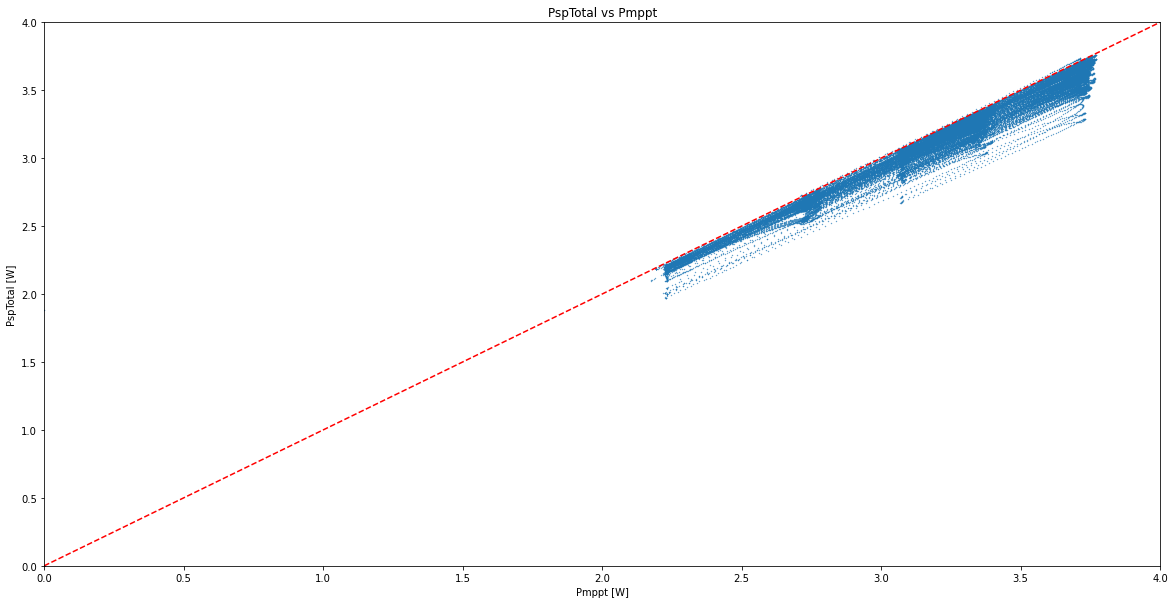

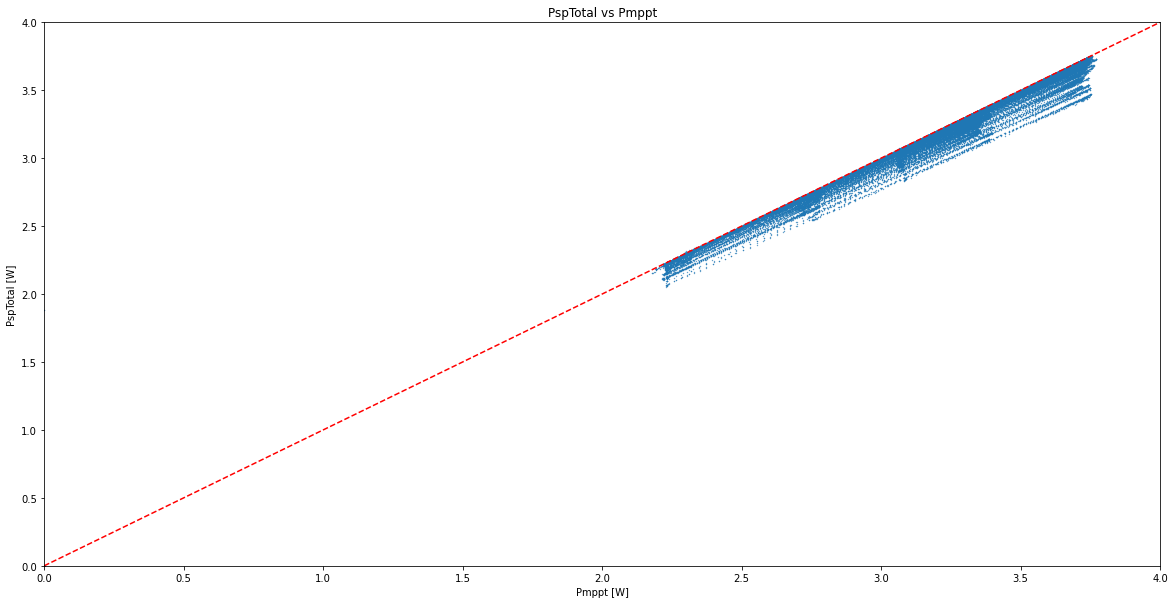

In [17]:
case = 0
scenario = 3
Pmppt = 0
PspTotal = 1
# create list of 70024 points from 0 to 4
x = [(i*4/timeLength) for i in range(timeLength)]

plt.figure(figsize=(20, 10))
# decrease dot size
plt.scatter(raw[scenario][case][Pmppt], raw[scenario][case][PspTotal], s=0.1)
plt.xlabel('Pmppt [W]')
plt.ylabel('PspTotal [W]')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.plot(x, x, 'r--')
plt.title('PspTotal vs Pmppt')
plt.show()

scenario = 0
plt.figure(figsize=(20, 10))
plt.scatter(raw[scenario][case][Pmppt], raw[scenario][case][PspTotal], s=0.1)
plt.xlabel('Pmppt [W]')
plt.ylabel('PspTotal [W]')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.plot(x, x, 'r--')
plt.title('PspTotal vs Pmppt')
plt.show()

C:\Users\vinic\AppData\Local\Temp\ipykernel_10516\699514093.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax11 = plt.subplots(len(scenariosToPlot), 1, sharex=True)


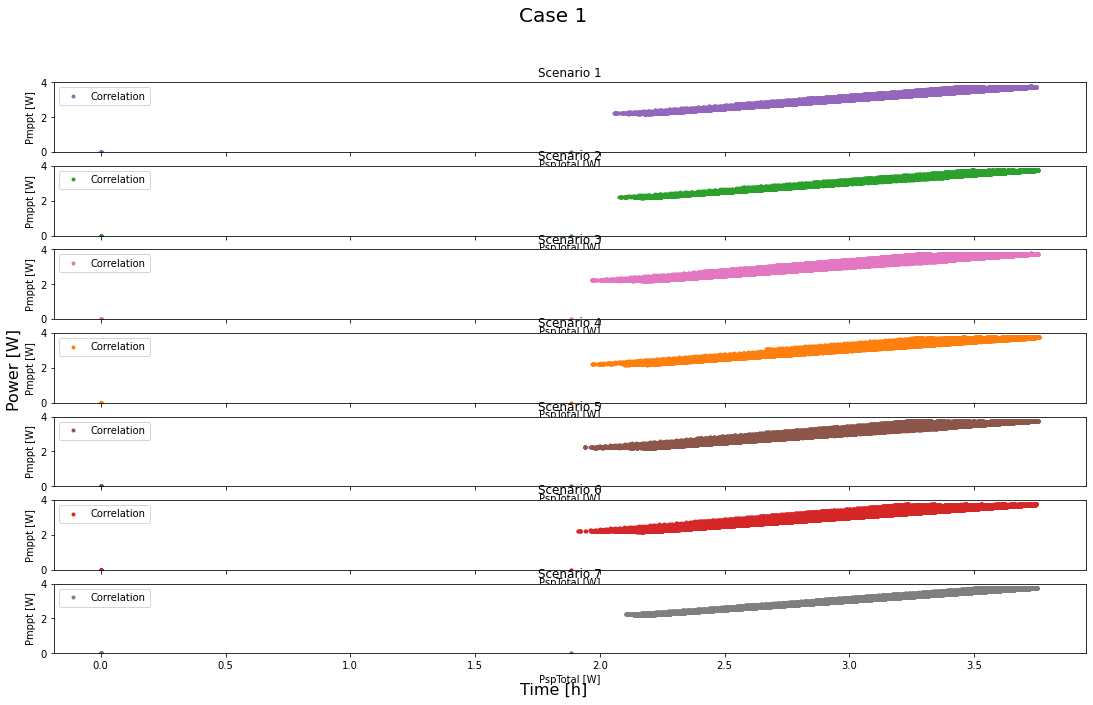

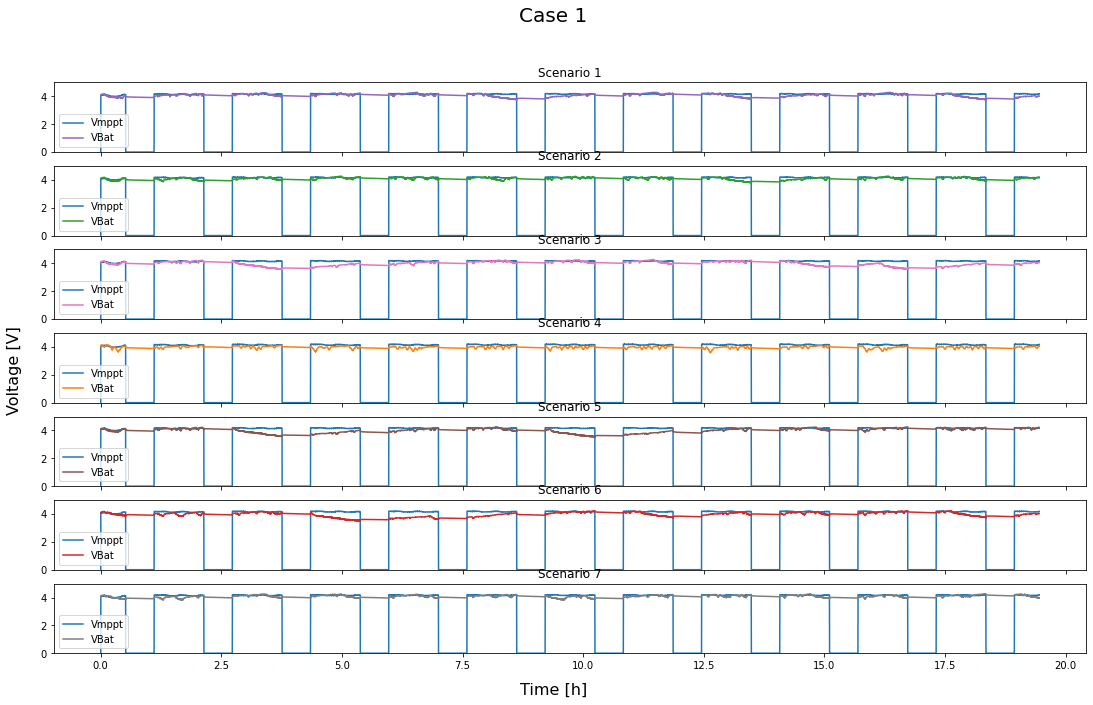

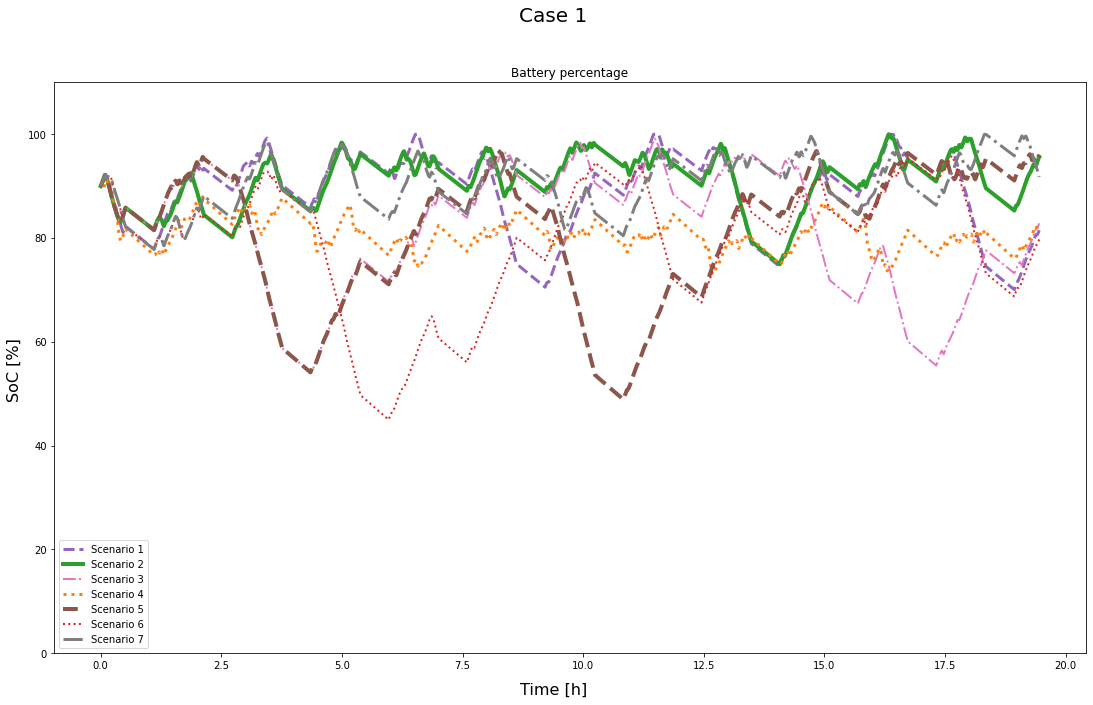

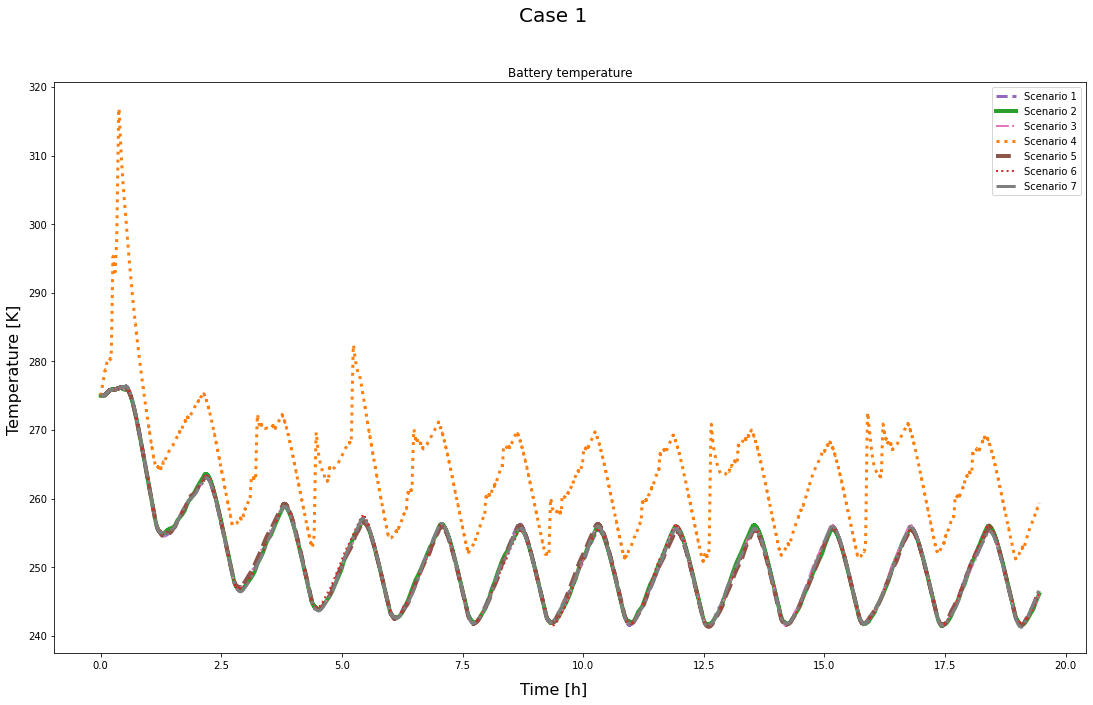

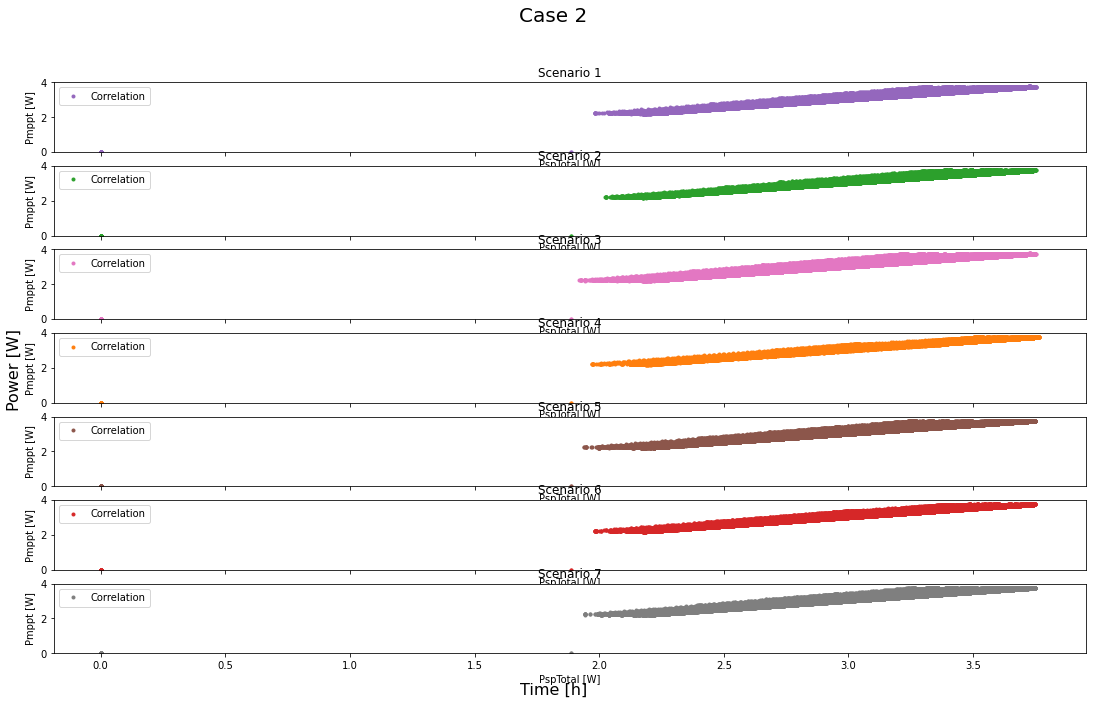

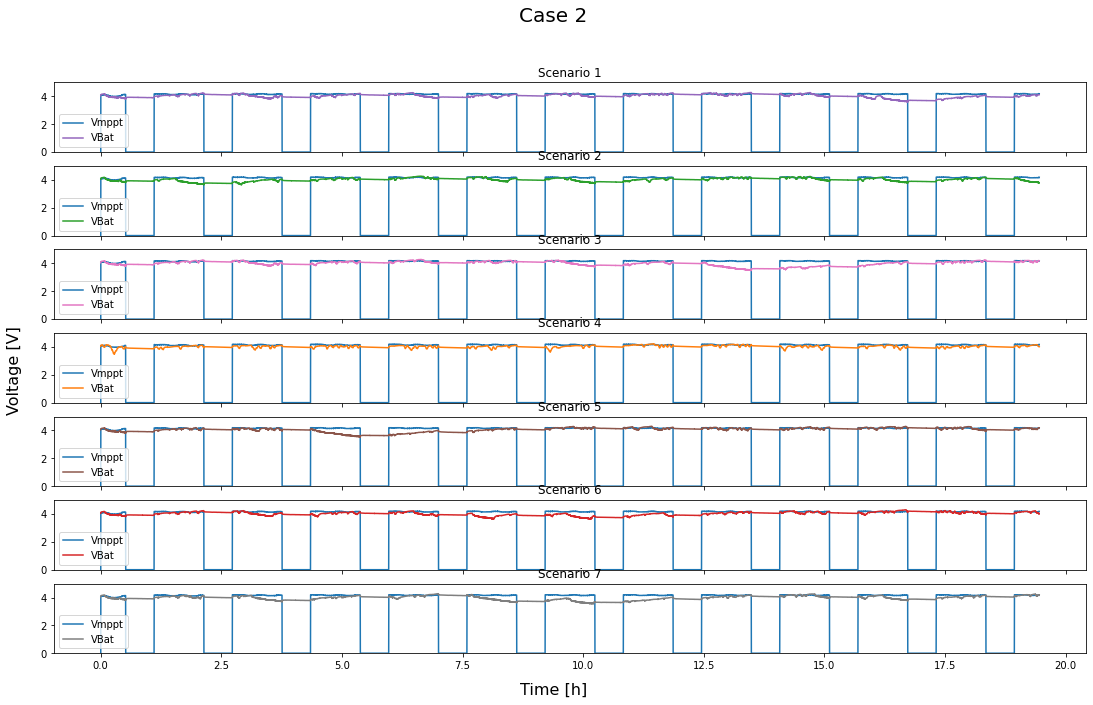

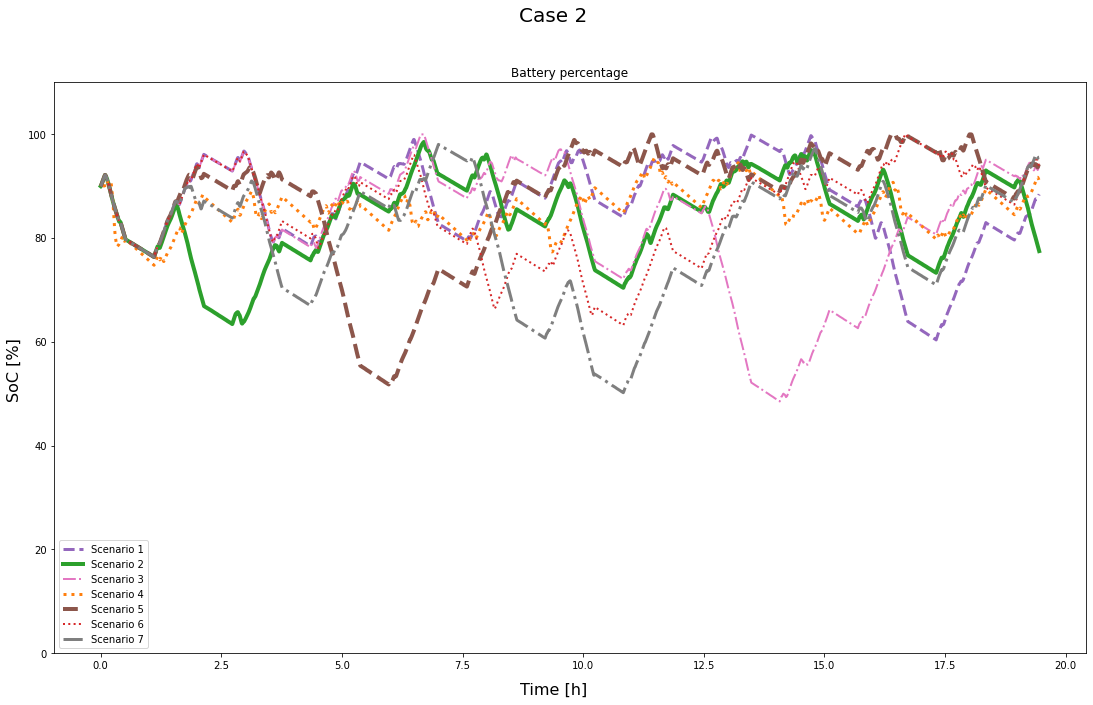

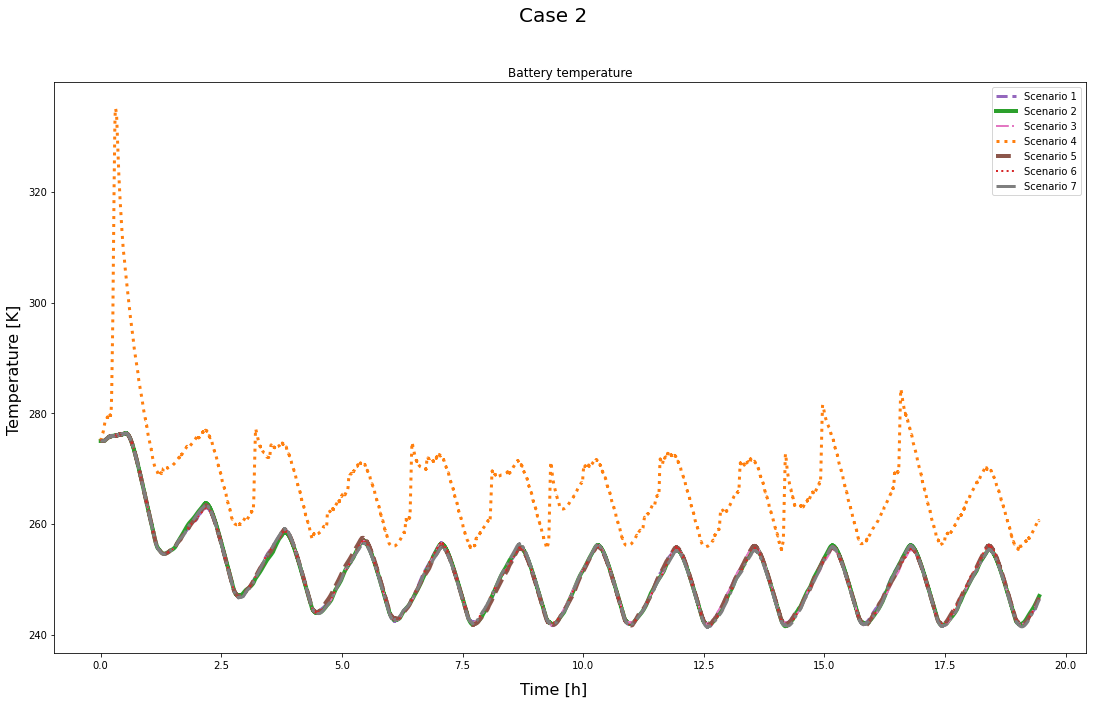

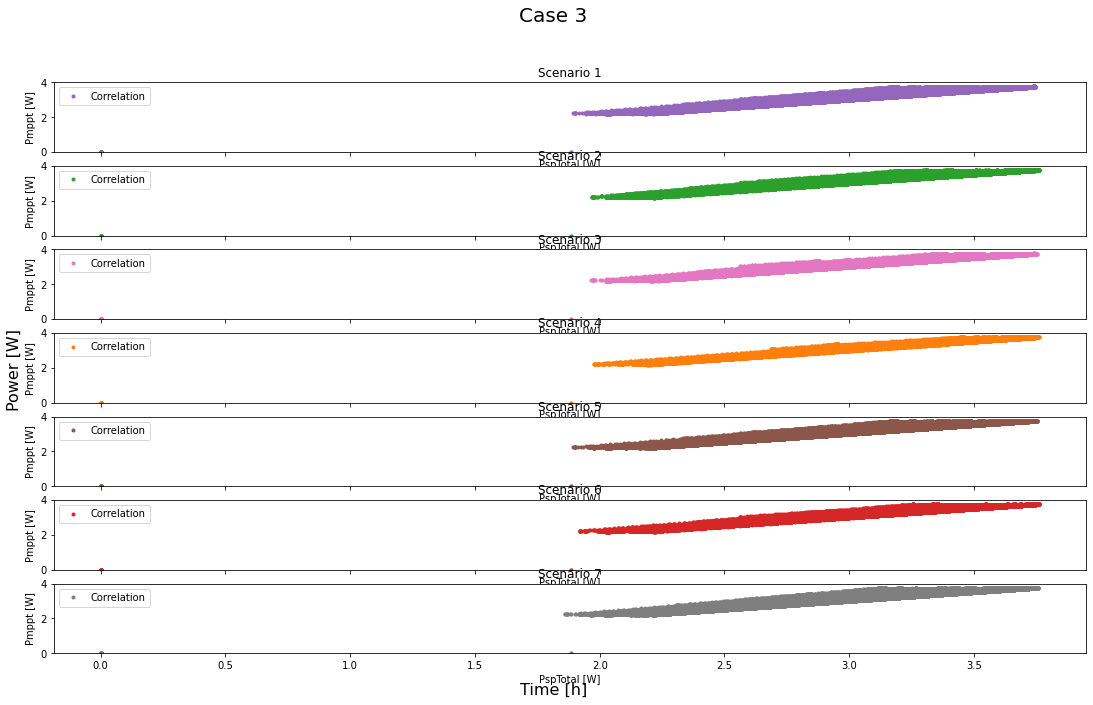

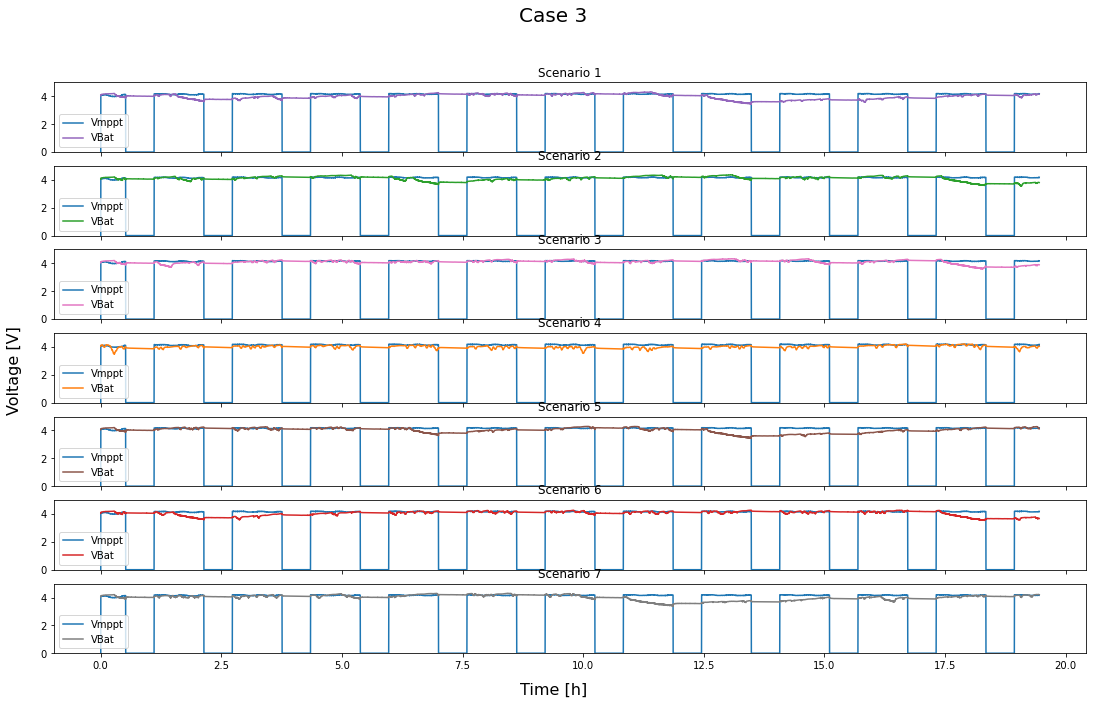

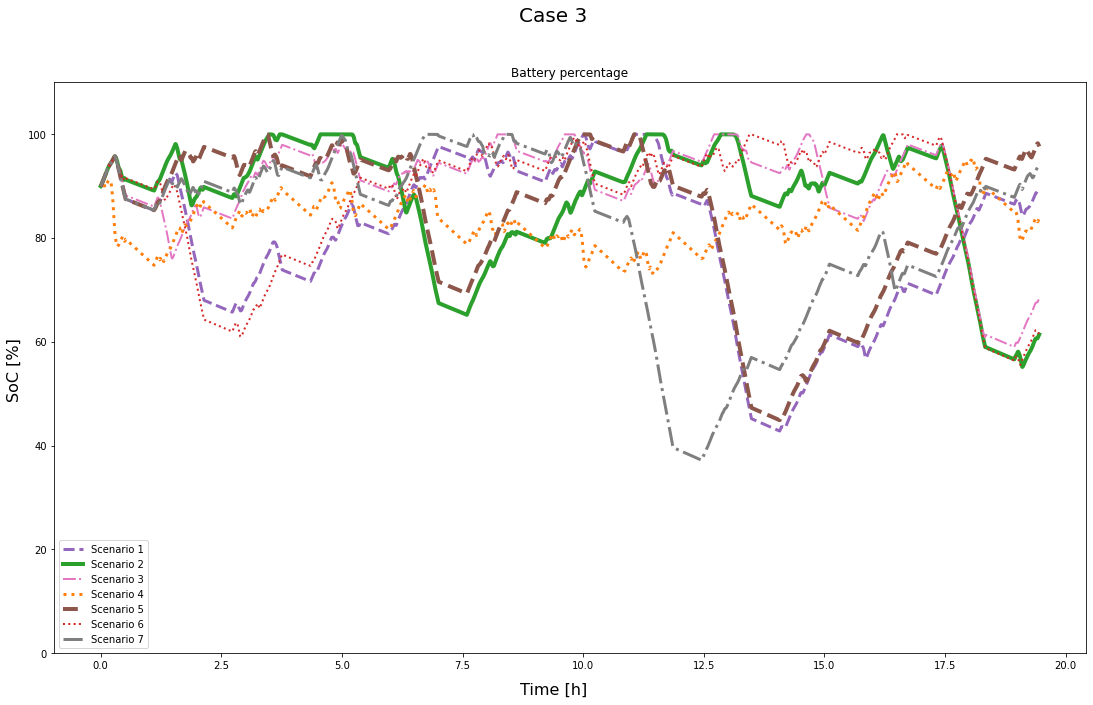

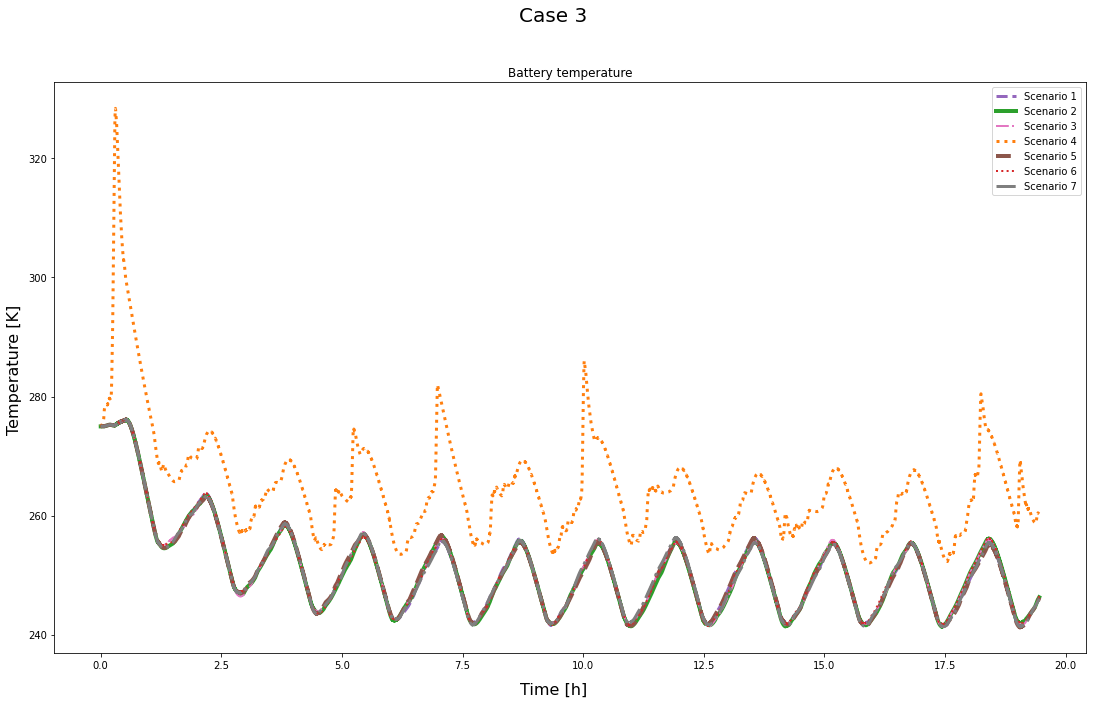

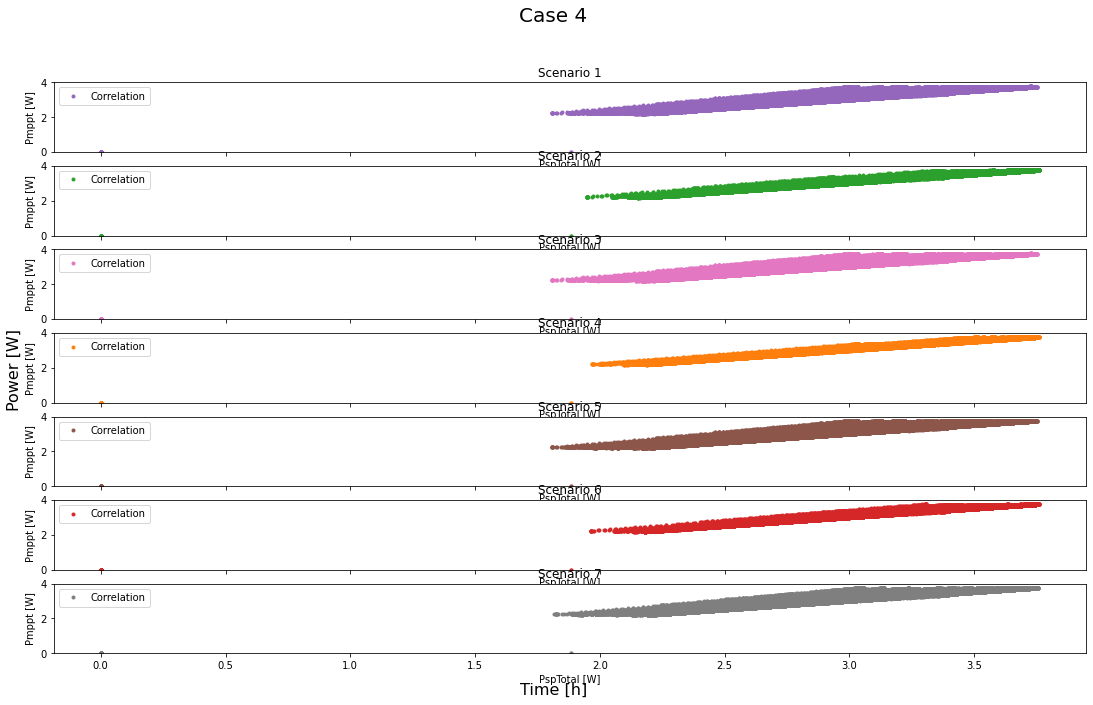

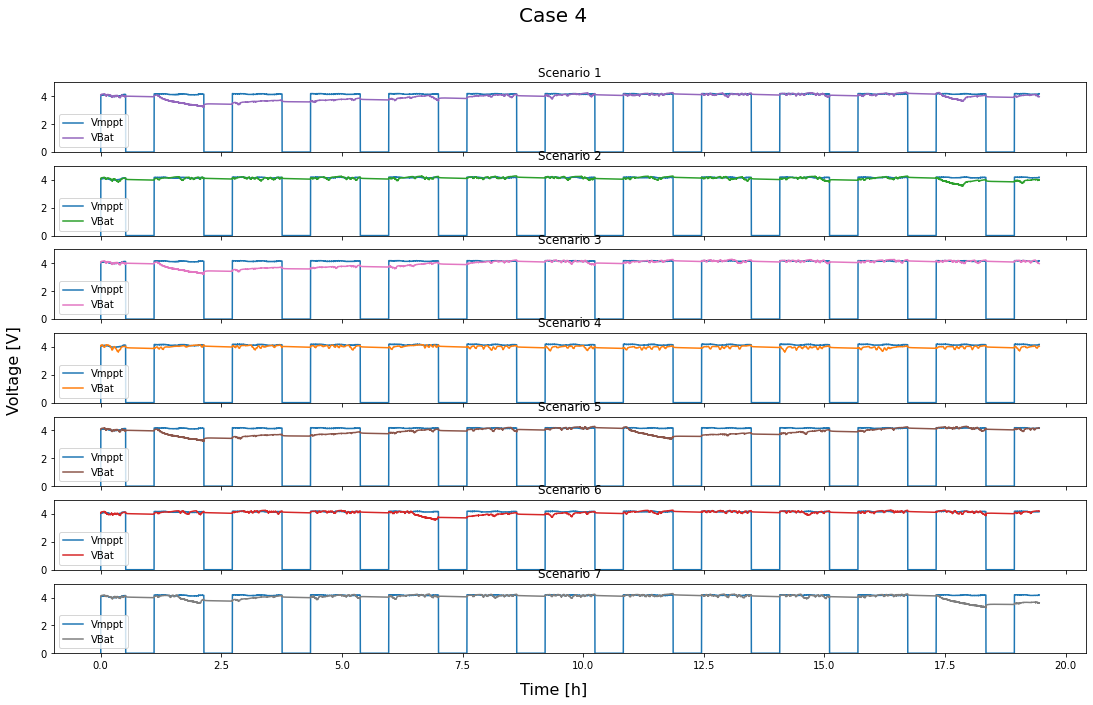

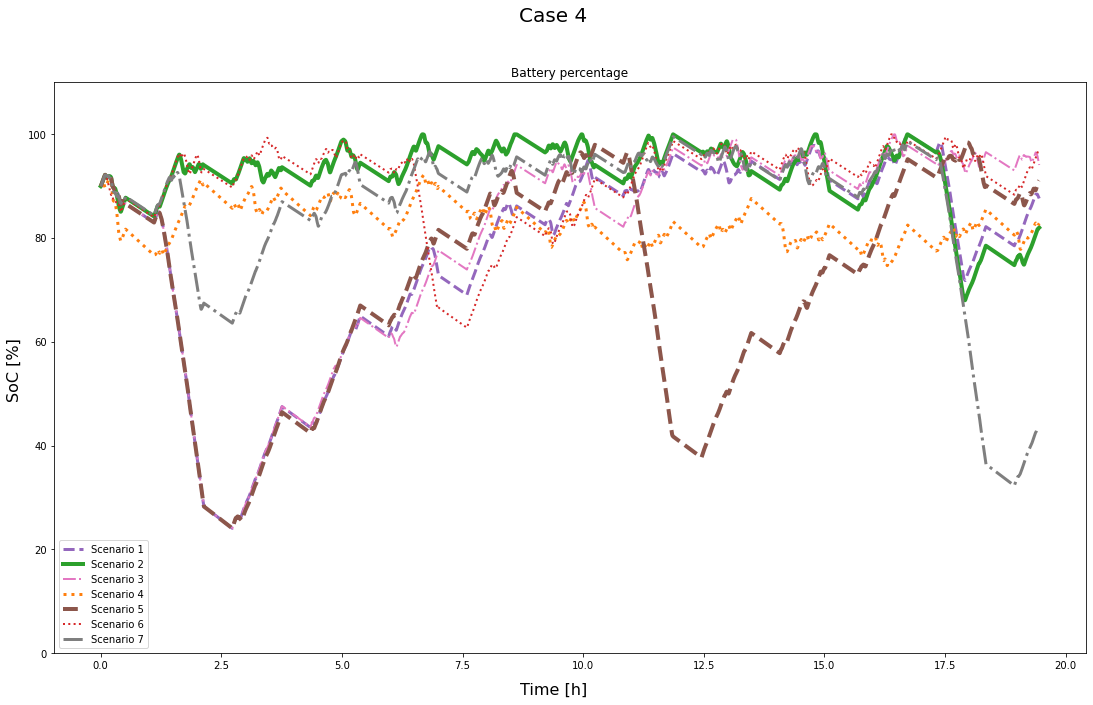

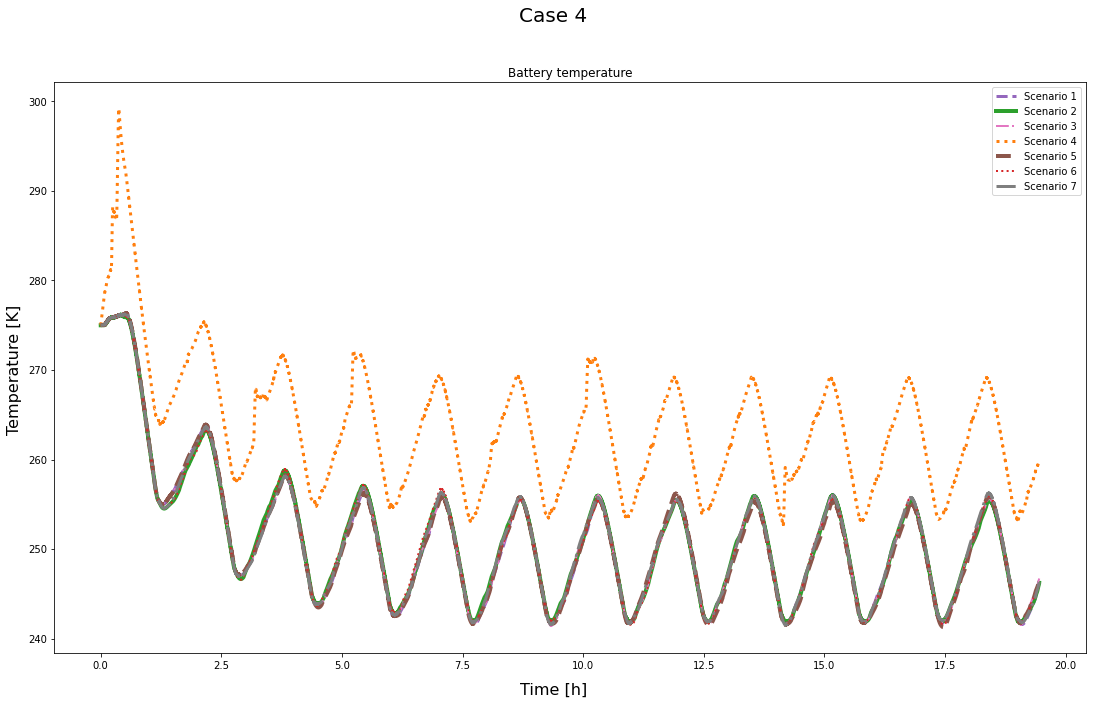

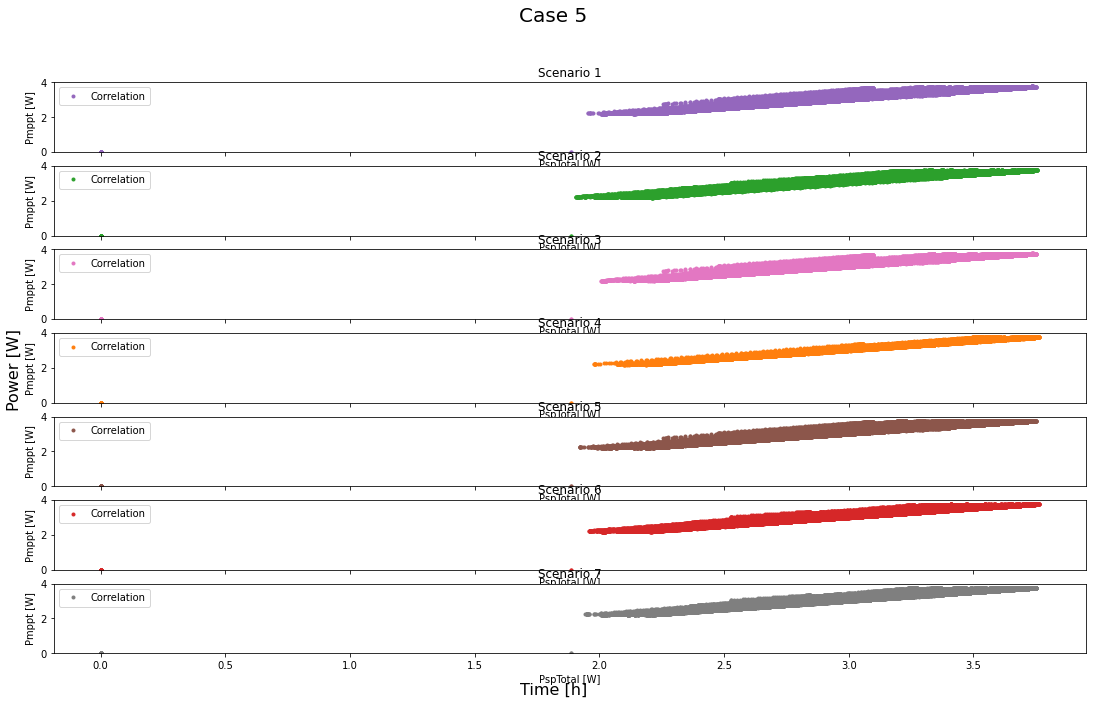

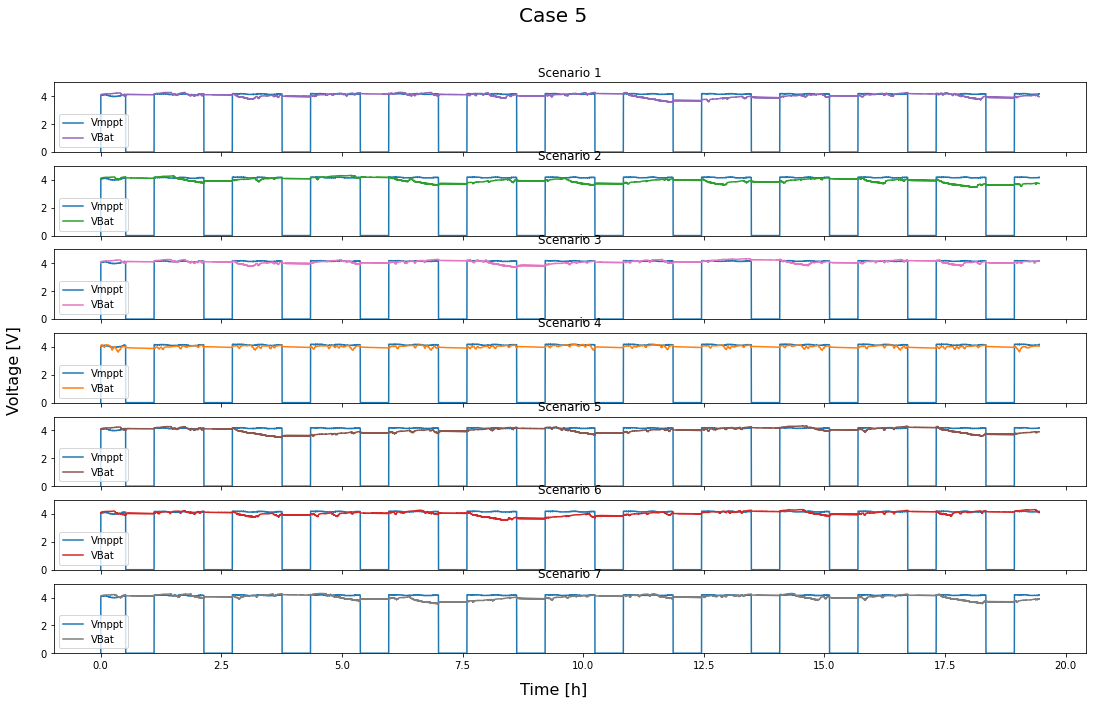

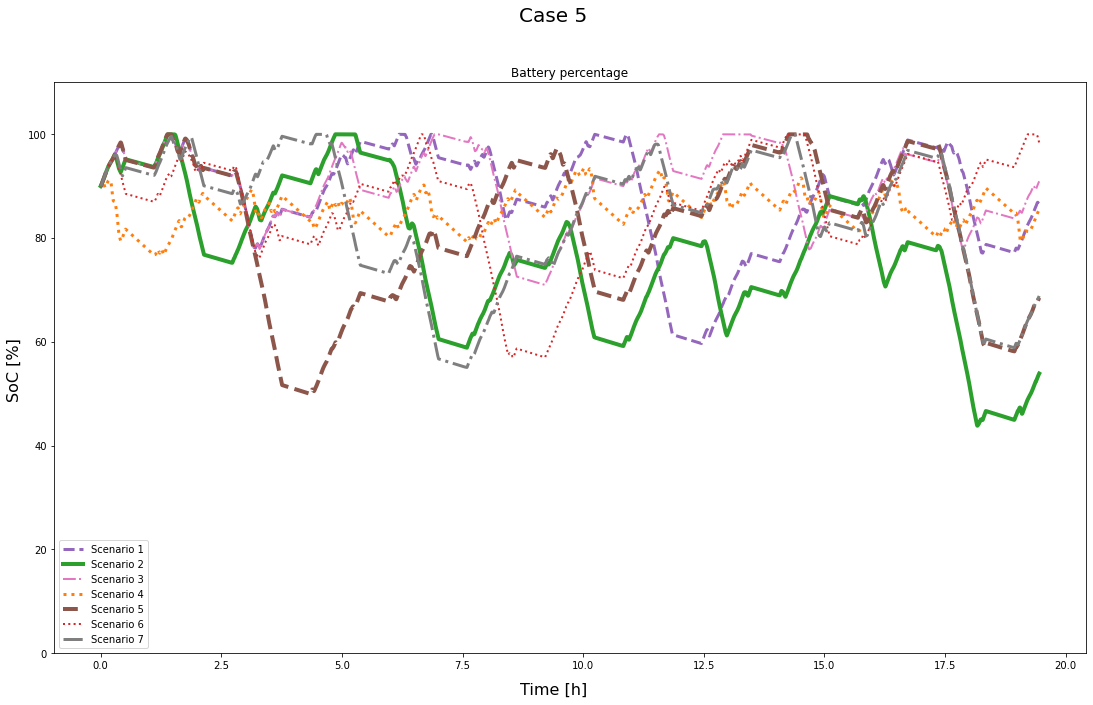

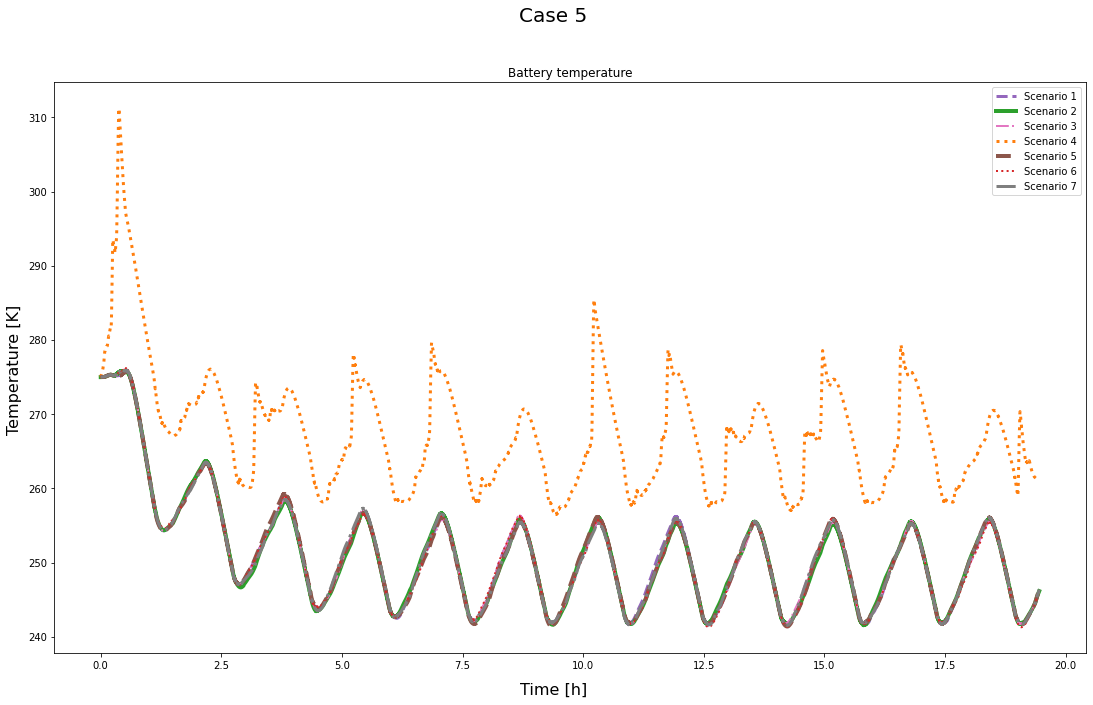

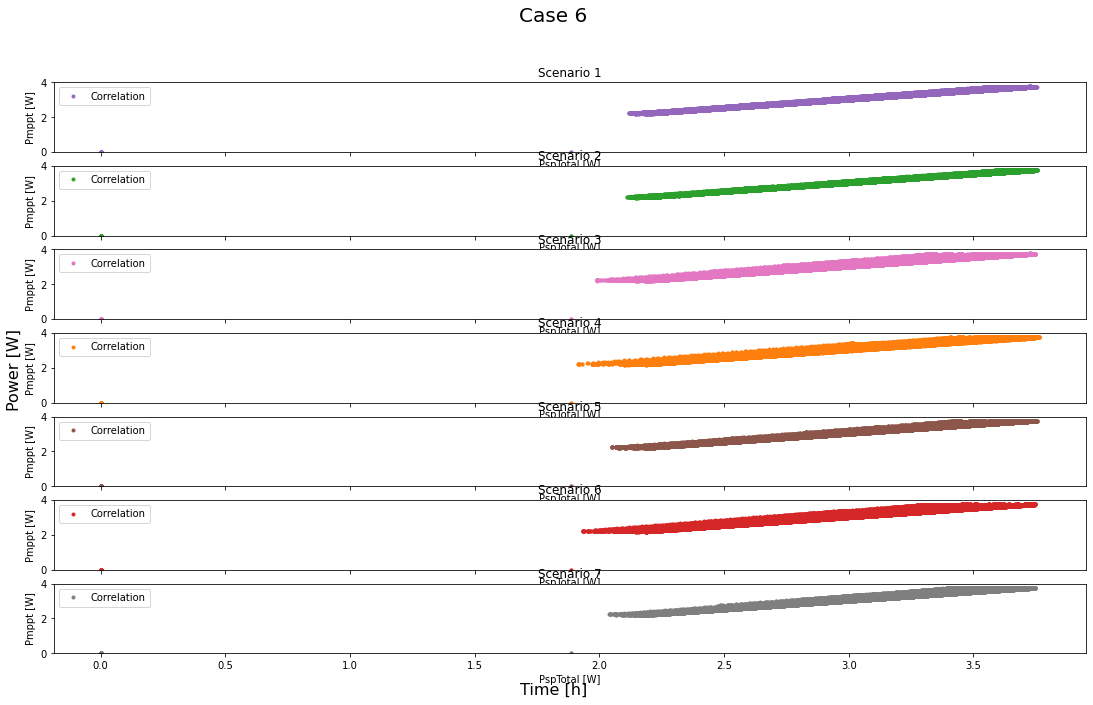

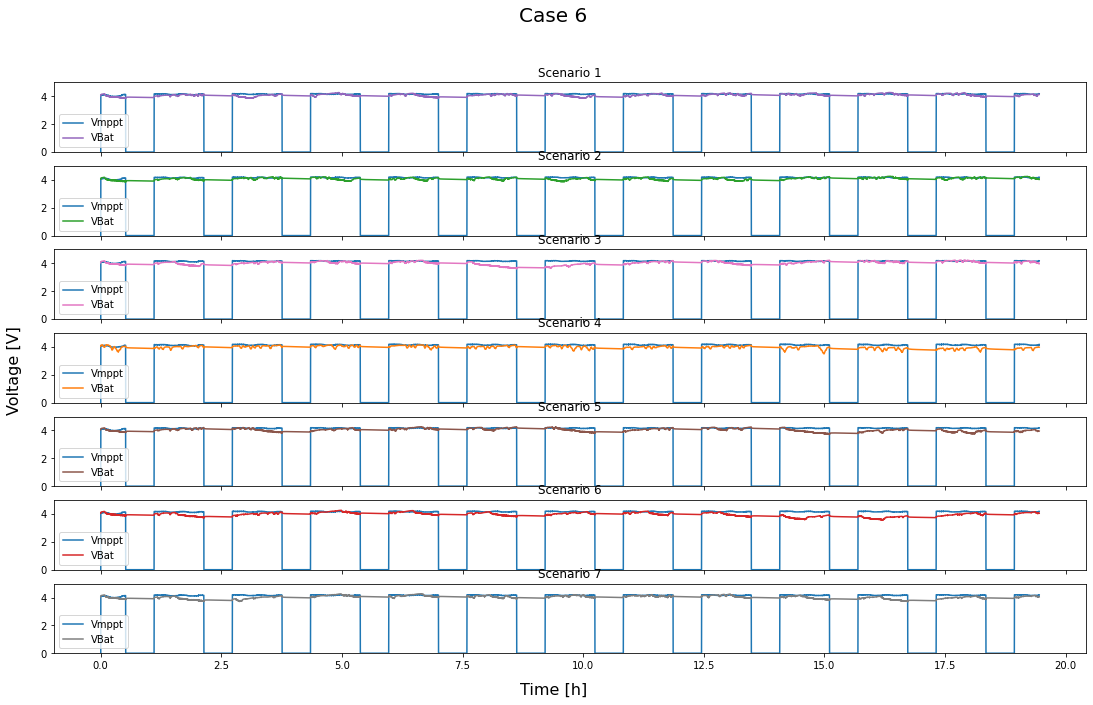

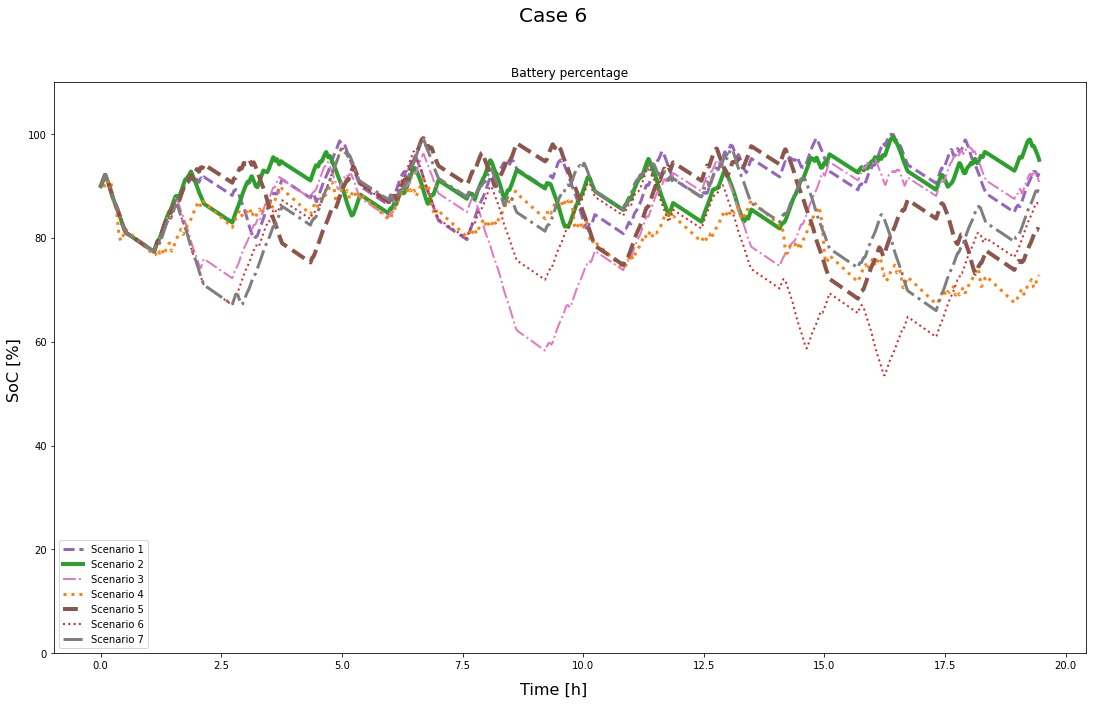

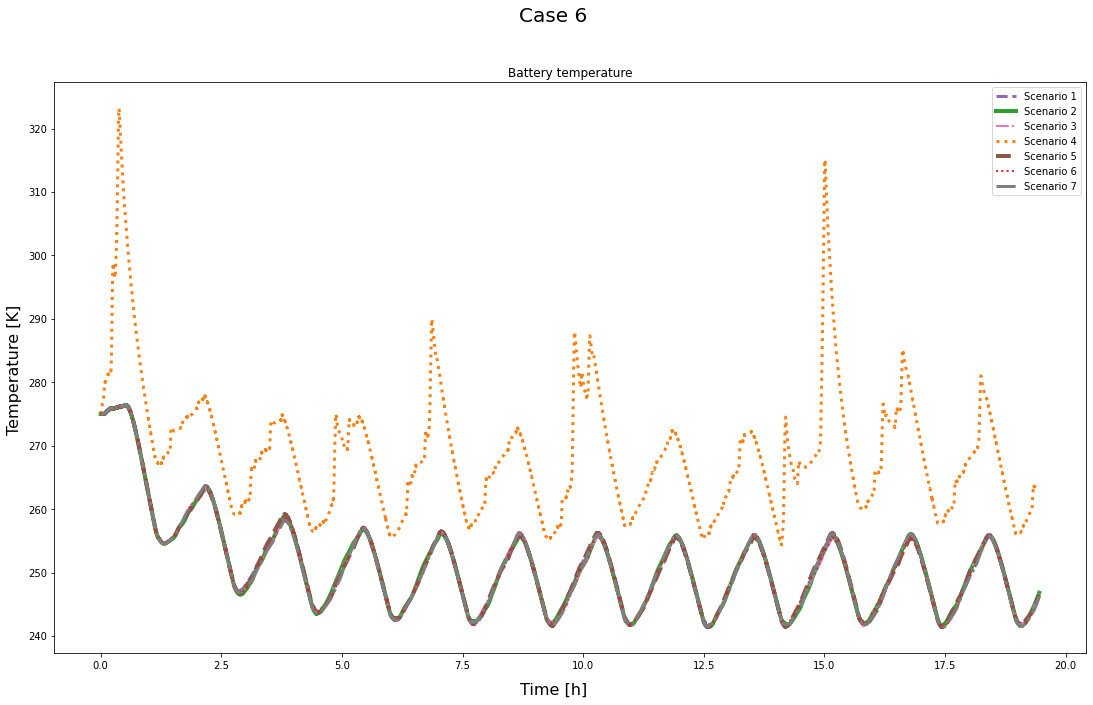

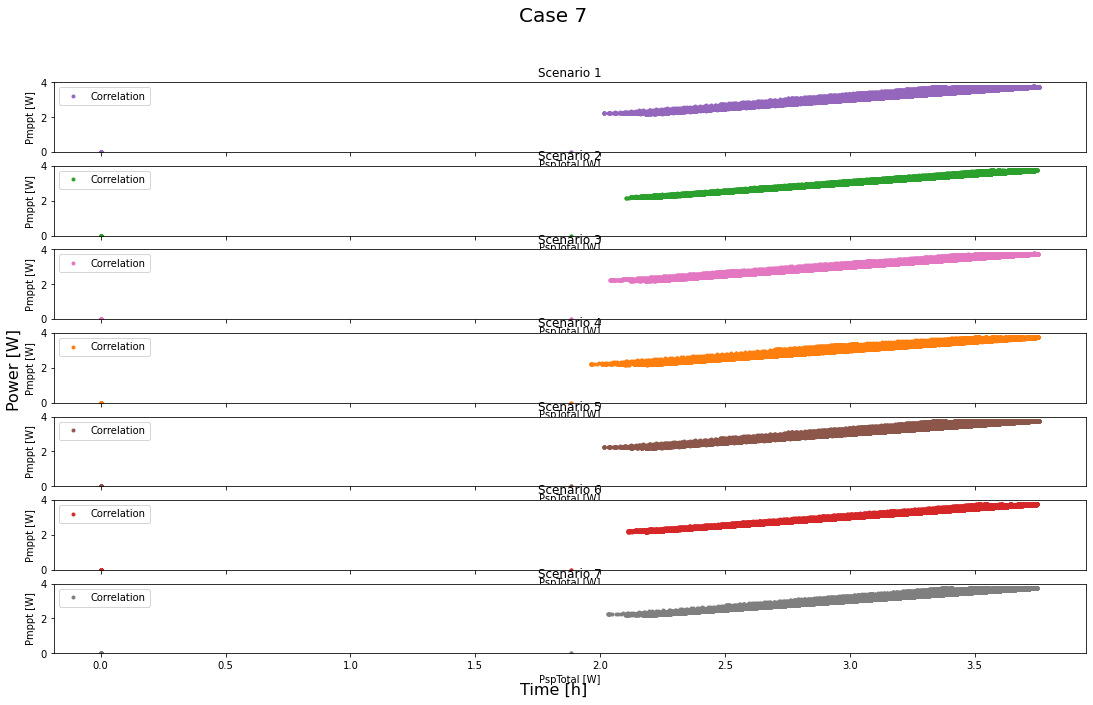

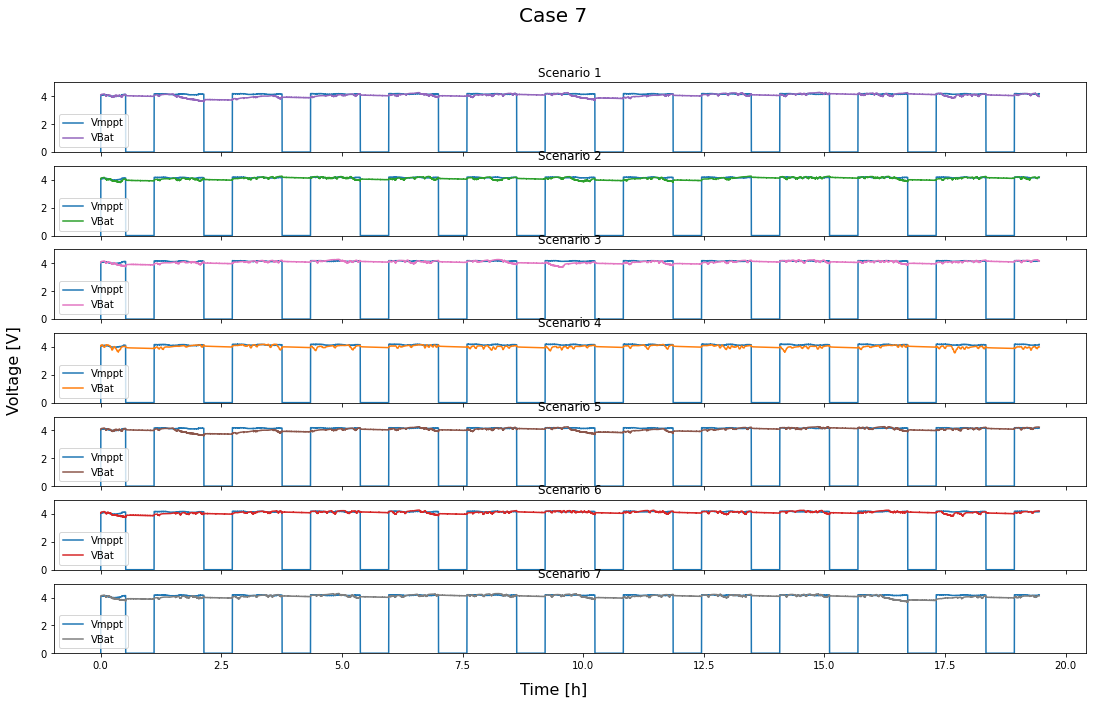

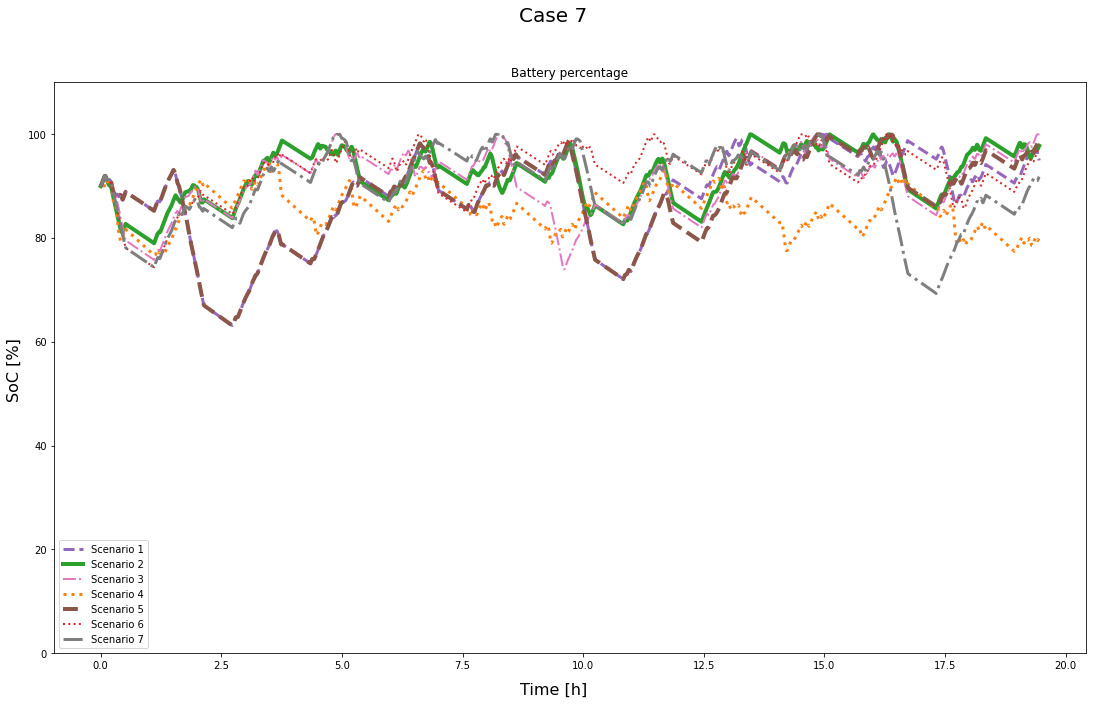

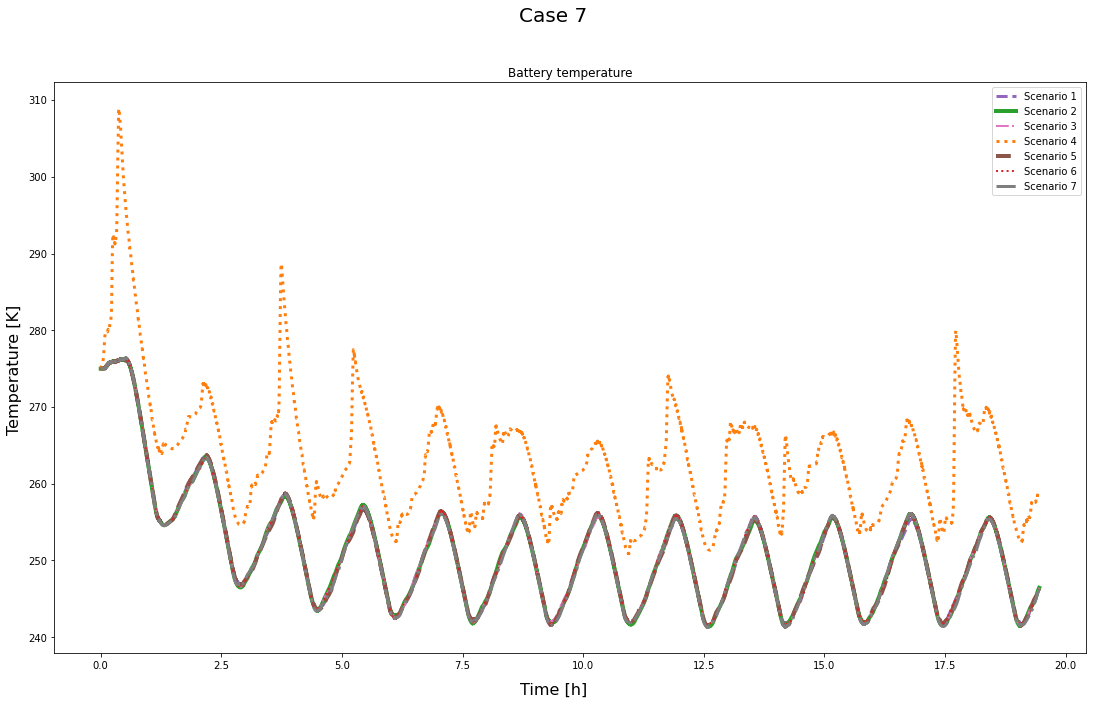

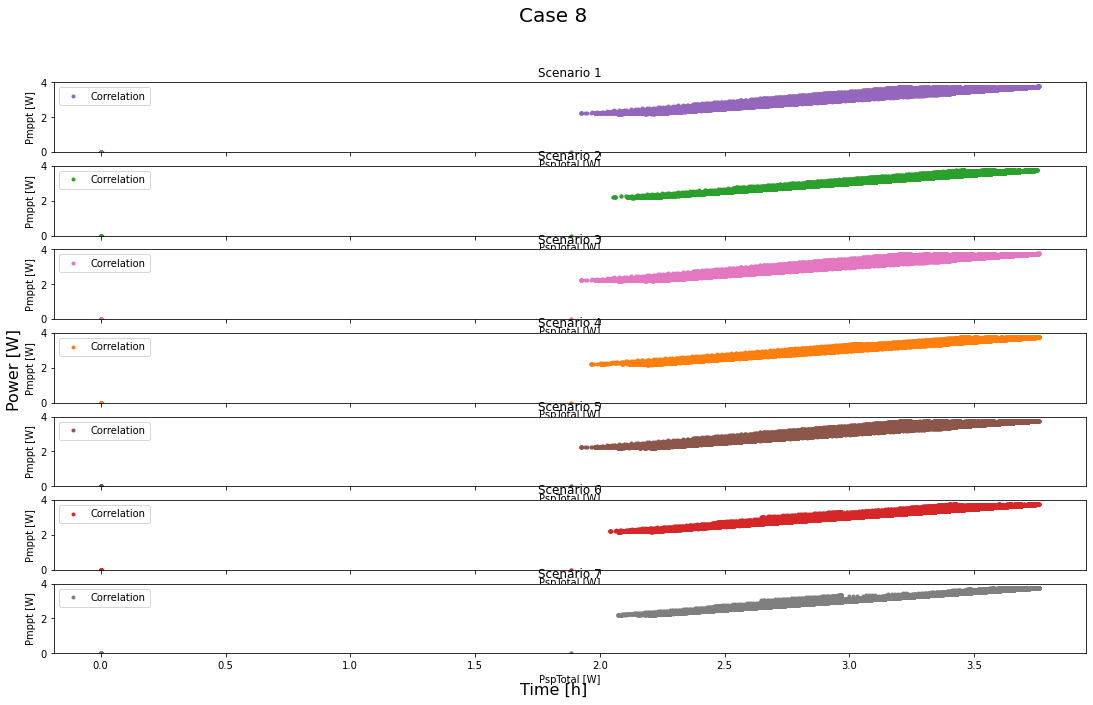

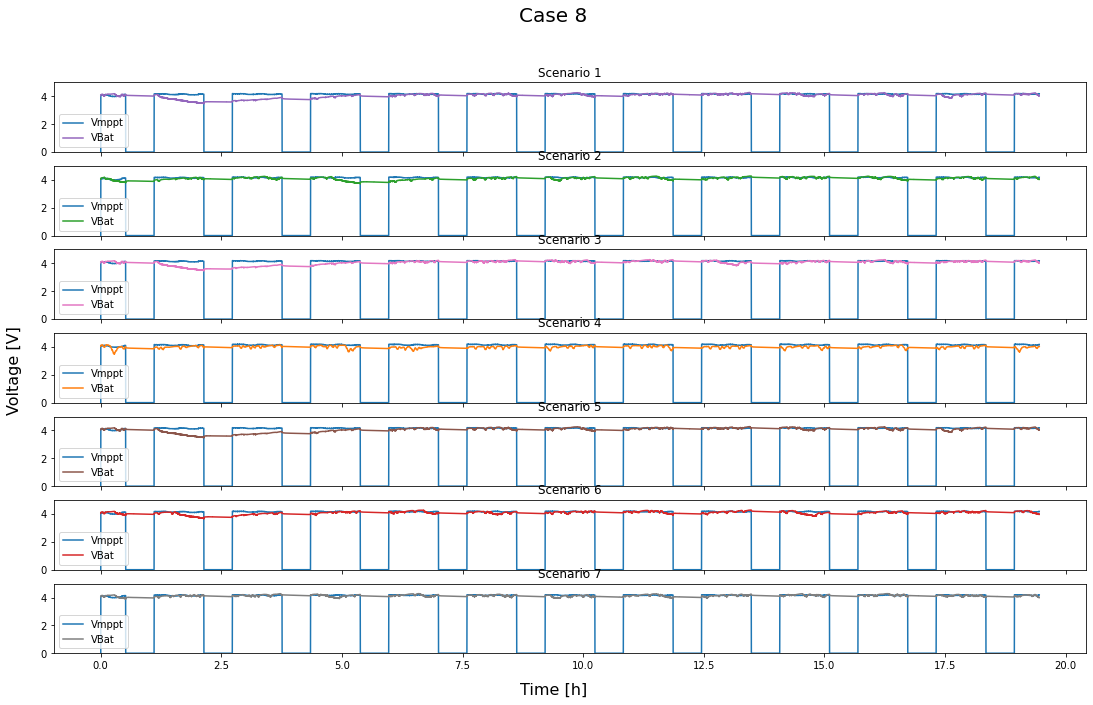

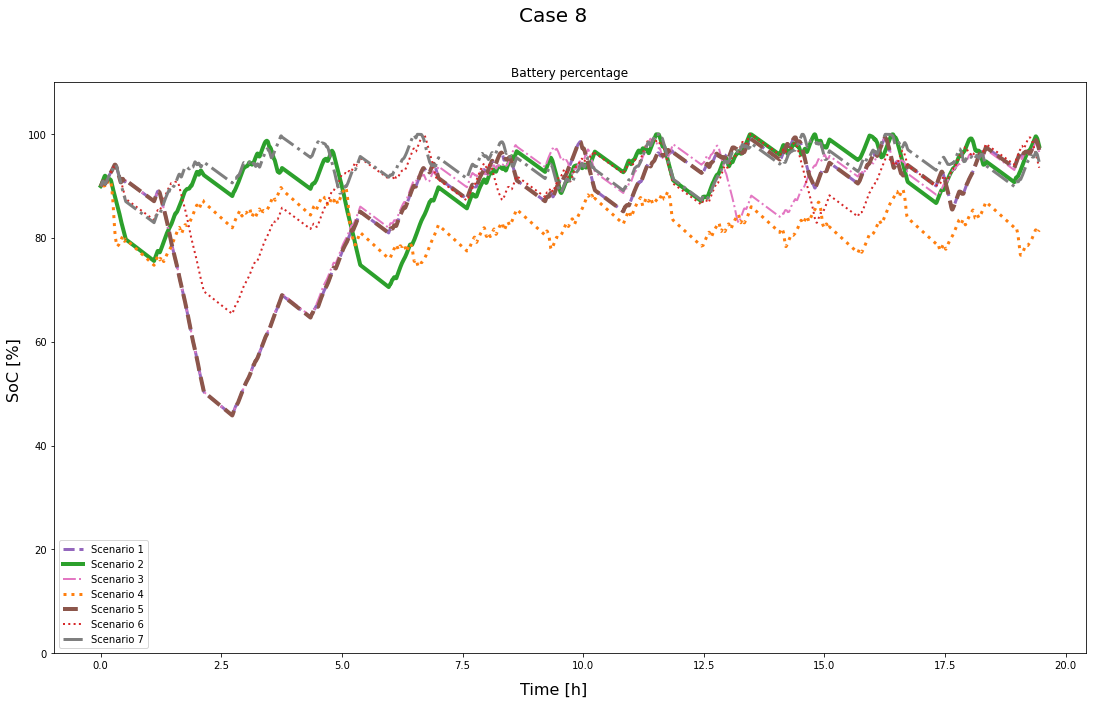

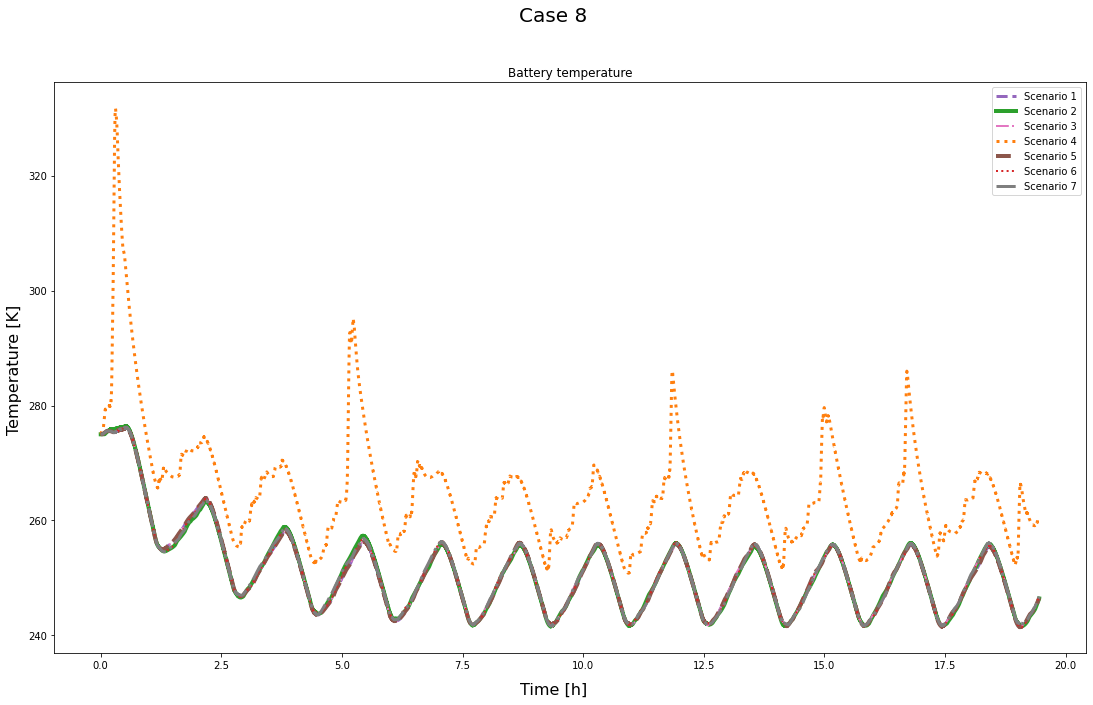

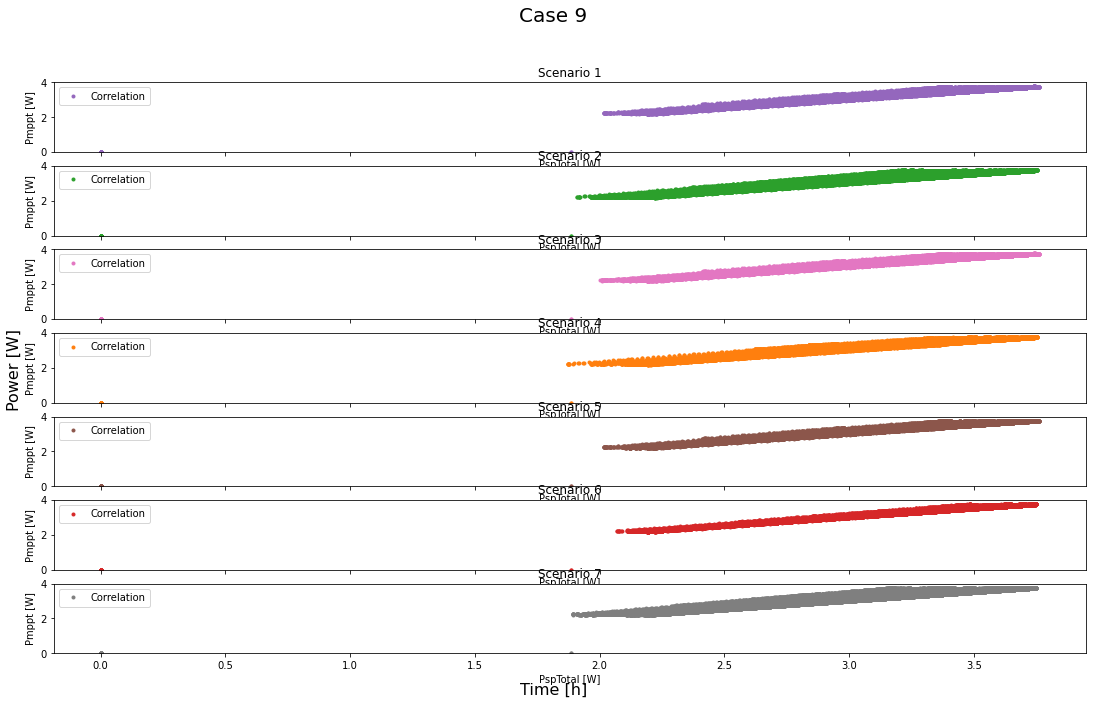

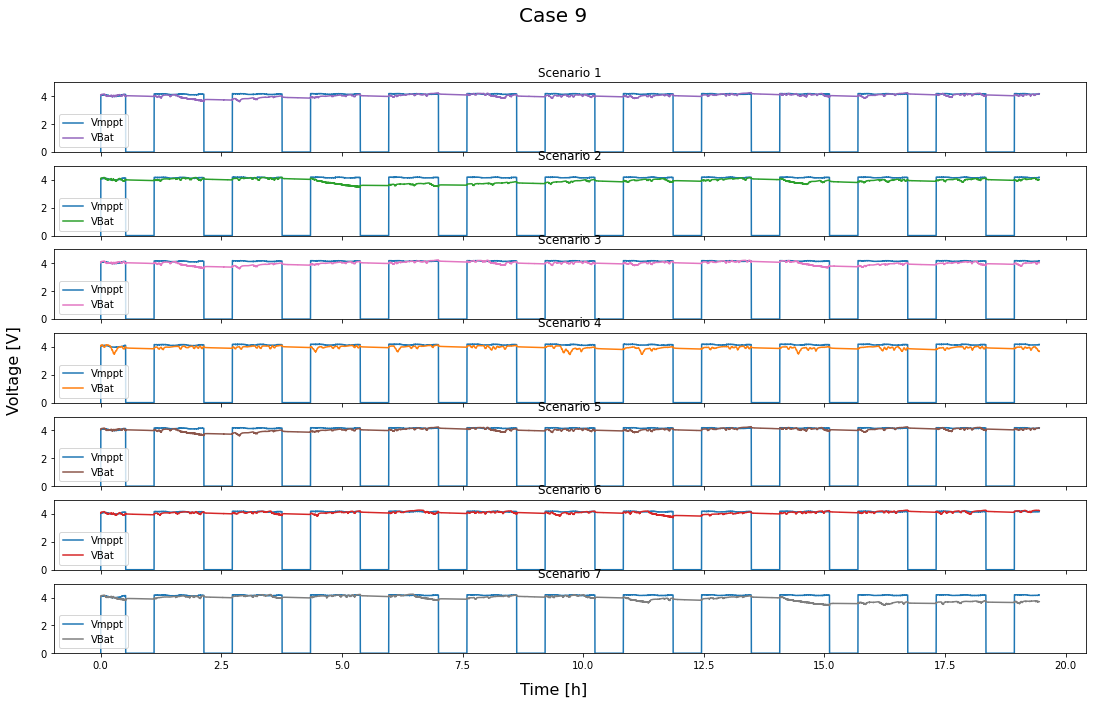

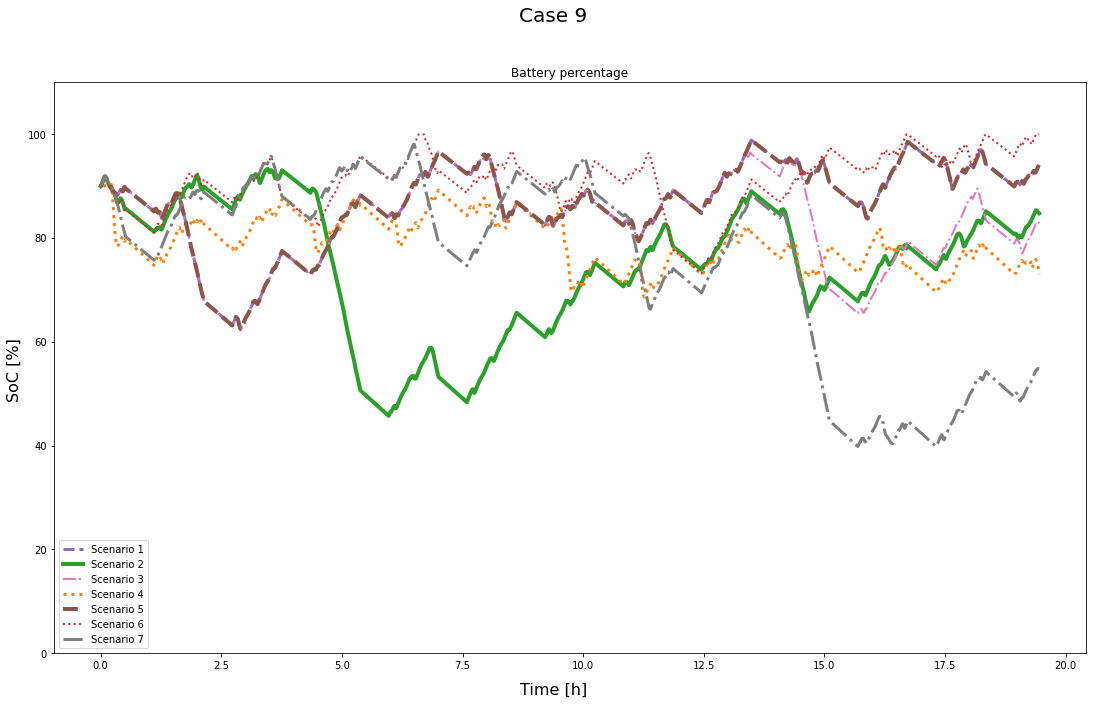

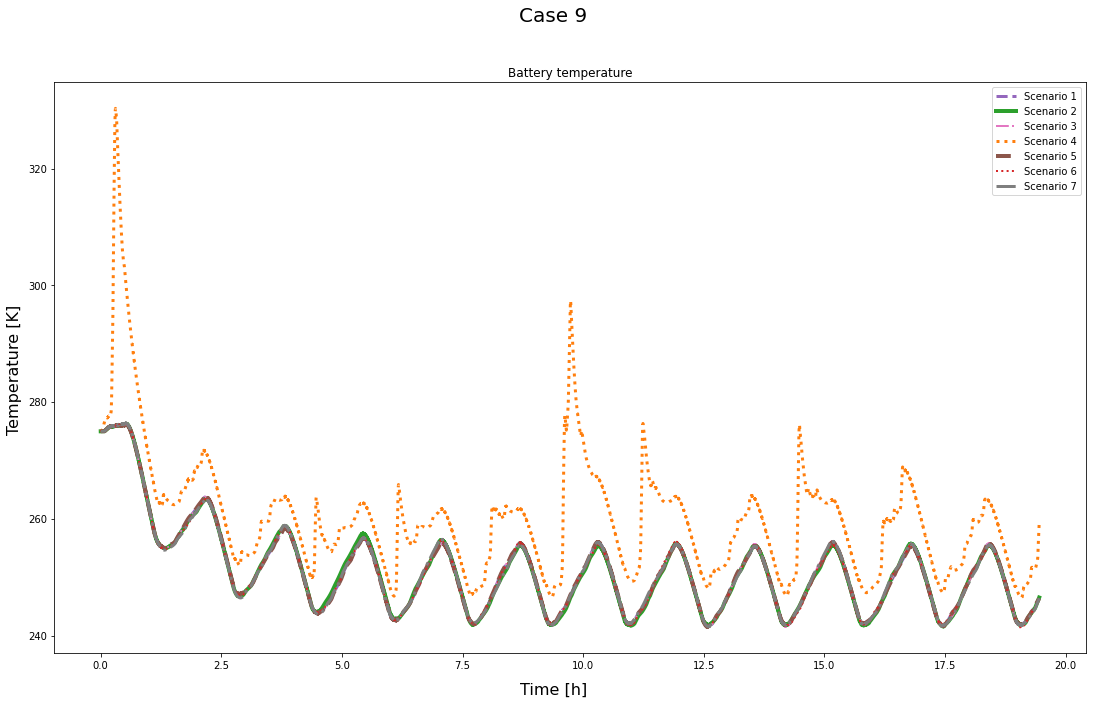

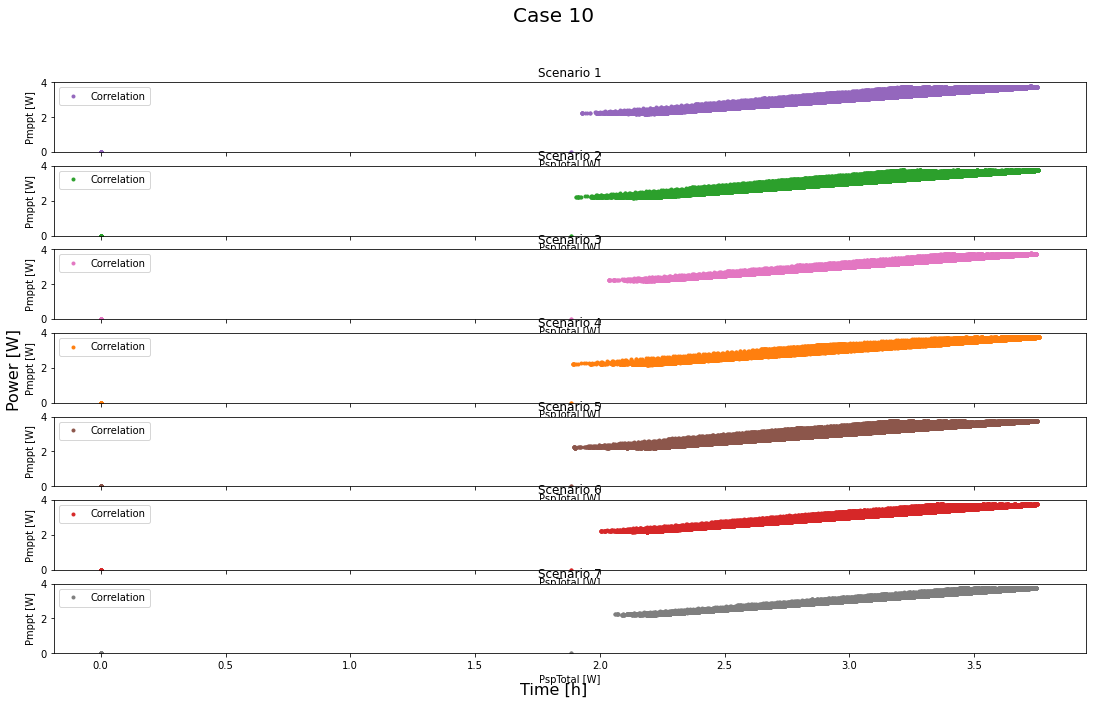

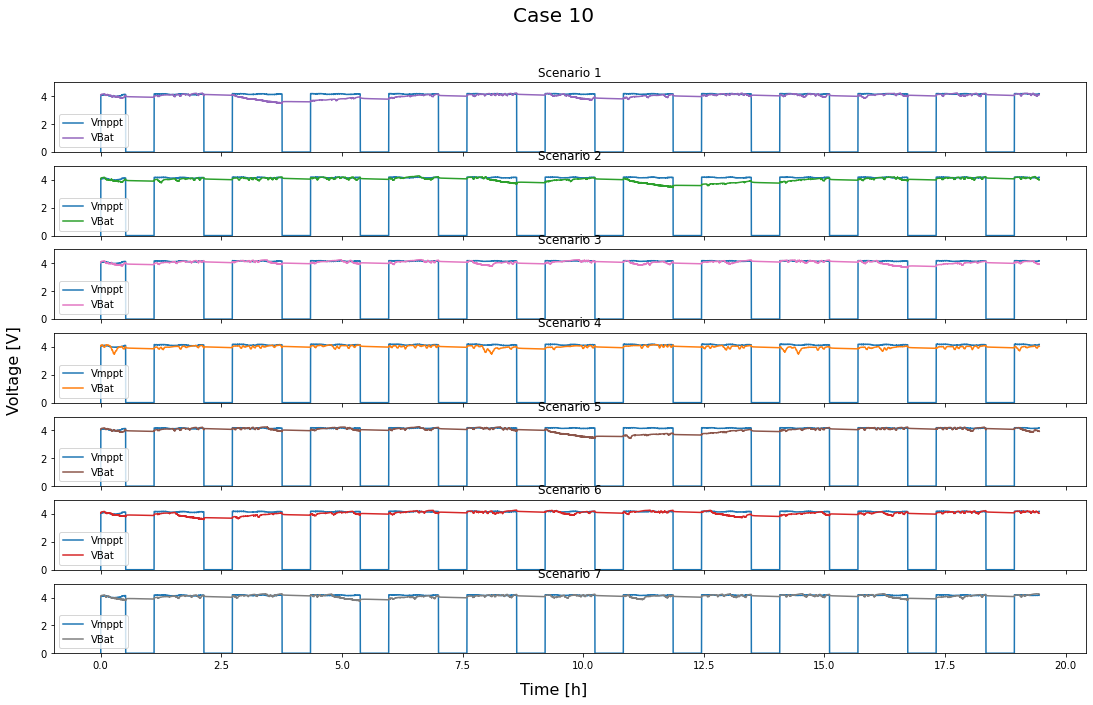

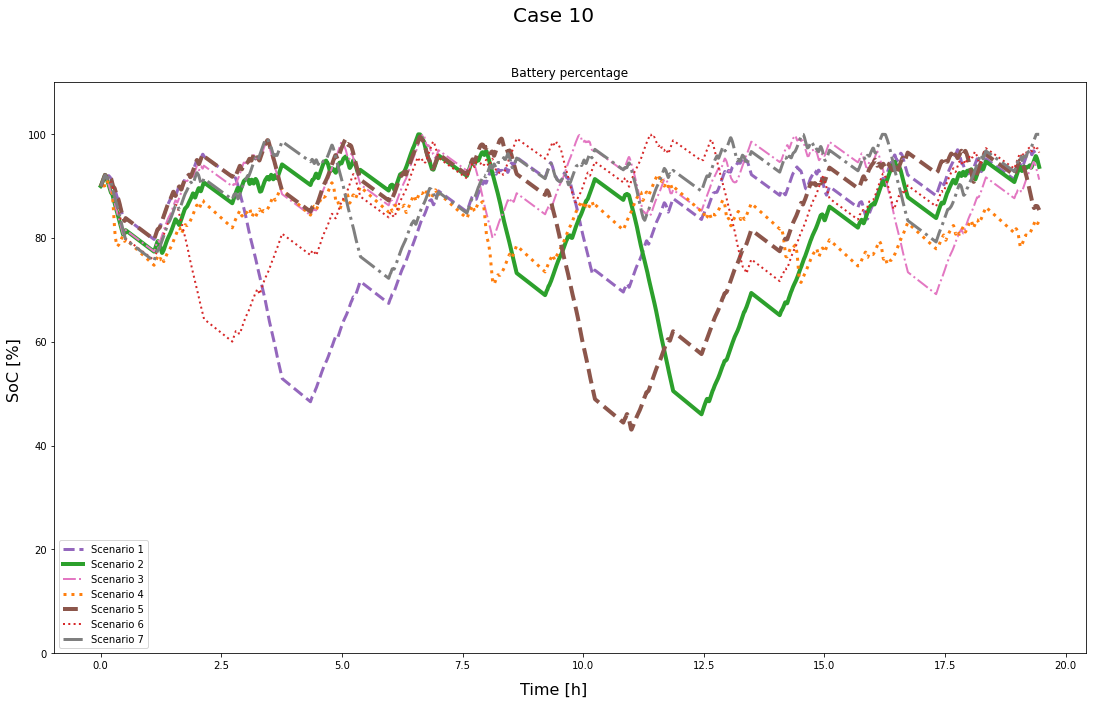

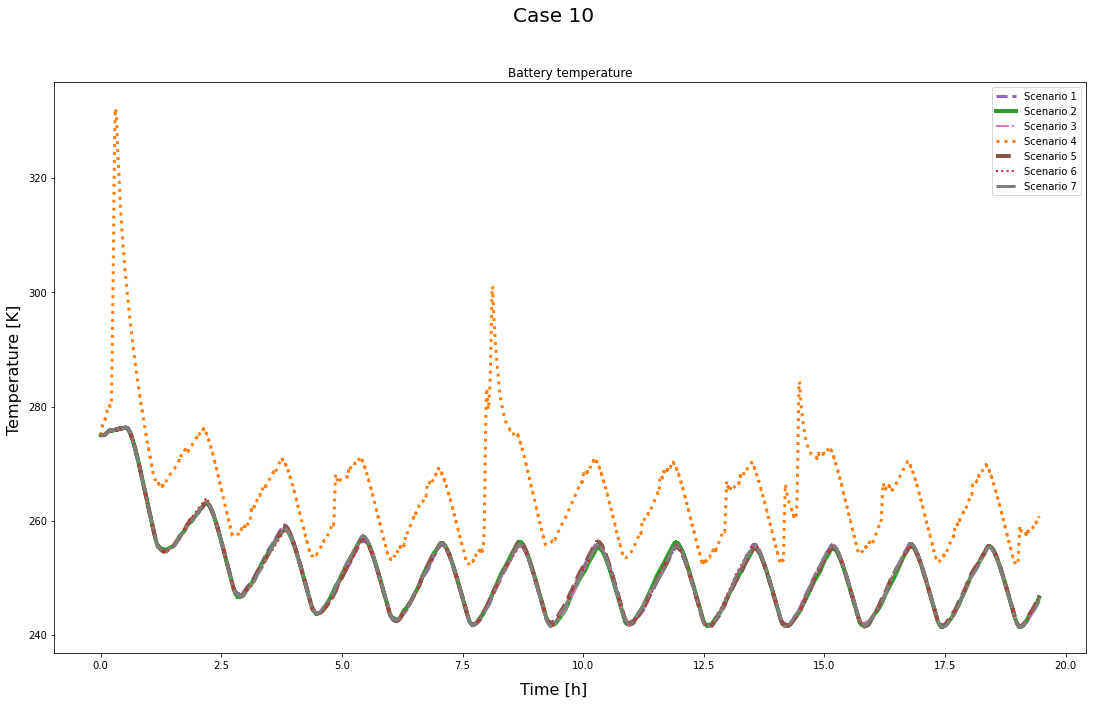

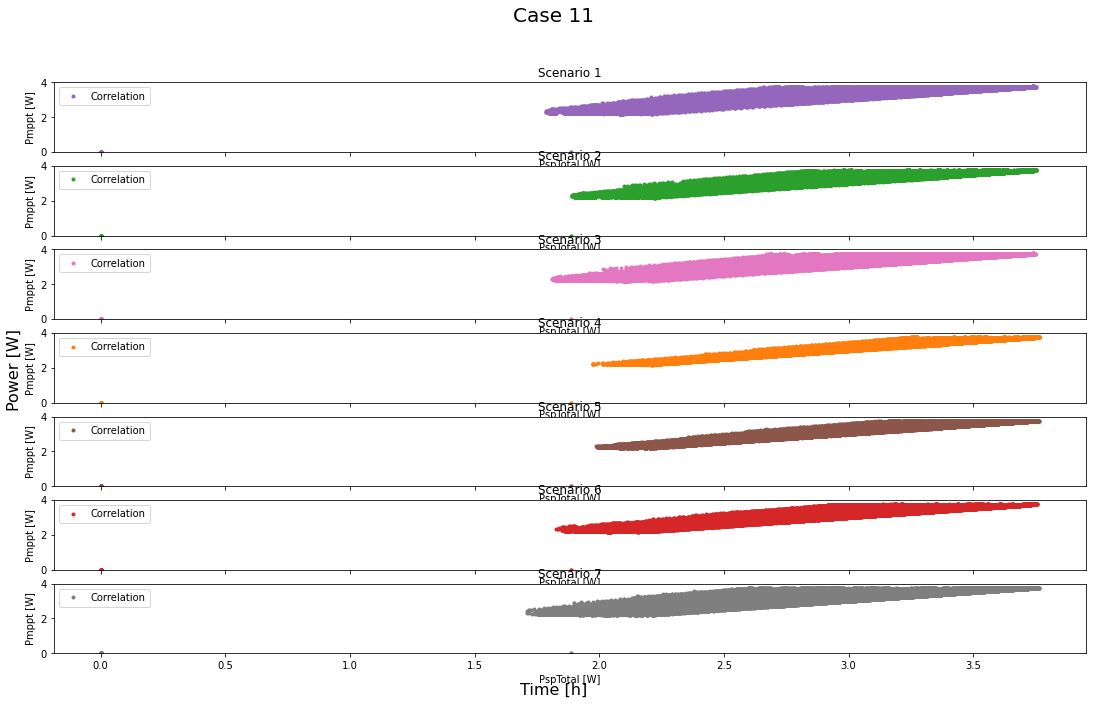

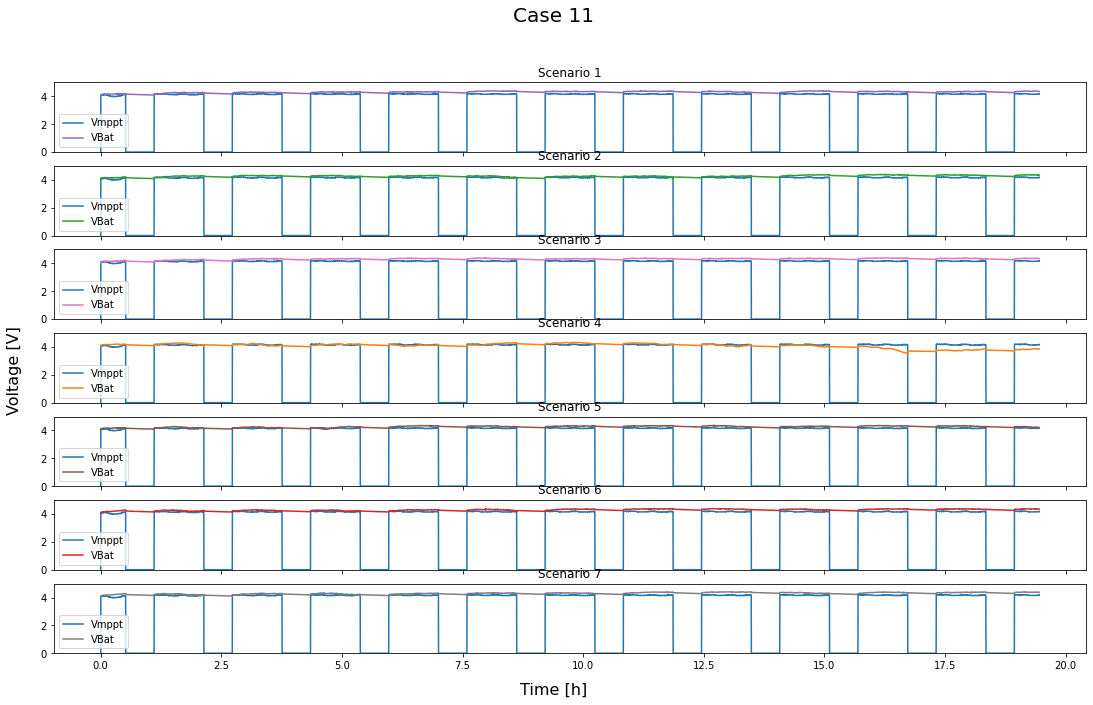

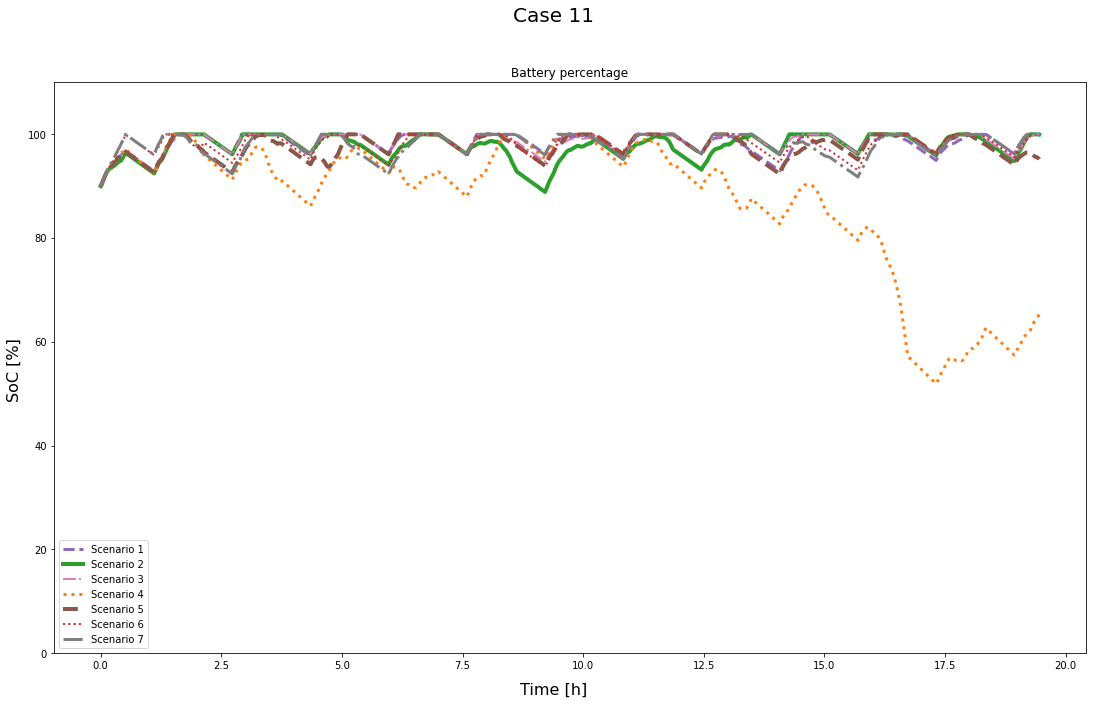

Error in callback <function flush_figures at 0x000002219543D480> (for post_execute):


KeyboardInterrupt: 

In [22]:
for case in casesToPlot:
    fig1, ax11 = plt.subplots(len(scenariosToPlot), 1, sharex=True)
    fig1.suptitle("Case " + str(case+1), fontsize=20)
    fig1.set_size_inches(18.5, 10.5)
    fig1.text(0.5, 0.07, 'Time [h]', ha='center', fontsize=16)
    fig1.text(0.09, 0.5, 'Power [W]', va='center', rotation='vertical', fontsize=16)

    fig2, ax21 = plt.subplots(len(scenariosToPlot), 1, sharex=True)
    fig2.suptitle("Case " + str(case+1), fontsize=20)
    fig2.set_size_inches(18.5, 10.5)
    fig2.text(0.5, 0.07, 'Time [h]', ha='center', fontsize=16)
    fig2.text(0.09, 0.5, 'Voltage [V]', va='center', rotation='vertical', fontsize=16)

    fig3, ax31 = plt.subplots()
    fig3.suptitle("Case " + str(case+1), fontsize=20)
    fig3.set_size_inches(18.5, 10.5)
    fig3.text(0.5, 0.07, 'Time [h]', ha='center', fontsize=16)
    fig3.text(0.09, 0.5, 'SoC [%]', va='center', rotation='vertical', fontsize=16)

    fig4, ax41 = plt.subplots()
    fig4.suptitle("Case " + str(case+1), fontsize=20)
    fig4.set_size_inches(18.5, 10.5)
    fig4.text(0.5, 0.07, 'Time [h]', ha='center', fontsize=16)
    fig4.text(0.09, 0.5, 'Temperature [K]', va='center', rotation='vertical', fontsize=16)

    for i, scenario in scenariosToPlot:
        Pmppt = 0
        PspTotal = 1
        Vmppt = 2
        VBat = 3
        SoC = 4
        Dl_lost = 5
        tasks = range(6, len(raw[scenario][case]) - 4)
        PLoad = len(raw[scenario][case]) - 4
        Ph = len(raw[scenario][case]) - 3
        W = len(raw[scenario][case]) - 2
        TBat = len(raw[scenario][case]) - 1

        ax11[i].set_title("Scenario " + str(scenario+1))
        ax11[i].plot(timeVector, raw[scenario][case][Pmppt], label="Pmppt")
        ax11[i].plot(timeVector, raw[scenario][case][PspTotal], label="PspTotal", color=colors[scenario])
        ax11[i].set_ylim([0, 4])
        ax11[i].legend()

        ax21[i].set_title("Scenario " + str(scenario+1))
        ax21[i].plot(timeVector, raw[scenario][case][Vmppt], label="Vmppt")
        ax21[i].plot(timeVector, raw[scenario][case][VBat], label="VBat", color=colors[scenario])
        ax21[i].set_ylim([0, 5])
        ax21[i].legend()

        SoC_vector = [i*100 for i in raw[scenario][case][SoC]]
        ax31.set_title("Battery percentage")
        ax31.plot(timeVector, SoC_vector, lineStyles[scenario], label="Scenario " + str(i+1), color=colors[scenario], linewidth=(((scenario+1)%3)+2))
        ax31.set_ylim([0, 110])
        ax31.legend()

        ax41.set_title("Battery temperature")
        ax41.plot(timeVector, raw[scenario][case][TBat], lineStyles[scenario], label="Scenario " + str(i+1), color=colors[scenario], linewidth=(((scenario+1)%3)+2))
        ax41.legend()

In [ ]:
for case in casesToPlot:
    for i, scenario in scenariosToPlot:
        plt.figure(figsize =(16, 9))
        tasks = range(6, len(raw[scenario][case]) - 4)
        for task in tasks:
            y = task - 6
            plt.subplot(len(tasks), 1, y+1)
            plt.plot(timeVector, raw[scenario][case][tasks[y]], '-', linewidth=0.5)
        # Add labels
        plt.subplot(len(tasks), 1, 1)
        plt.title("Case " + str(case+1) + " Scenario " + str(scenario+1) + ":Tasks On-Off Status")
        for task in tasks:
            y = task - 6
            plt.subplot(len(tasks), 1, y+1)
            plt.ylabel('Task' + str(y+1))
            plt.ylim(-0.1, 1.1)
        plt.xlabel('Time [h]')
        # increase space between subplots
        plt.subplots_adjust(hspace=1.0)

0.007733680071849545


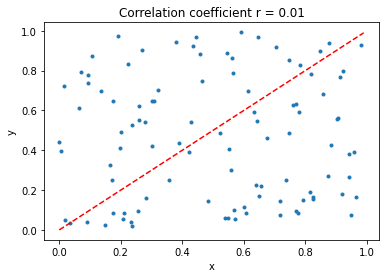

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
# generate two random lists of length 100 and calculate the correlation coefficient
x = np.random.rand(100)
y = np.random.rand(100)
middle = np.array(range(100)) / 100
r = np.corrcoef(x, y)[0, 1]
print(r)
# plot the two lists
plt.plot(x, y, '.')
plt.plot(middle, middle, 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Correlation coefficient r = %.2f' % r)
plt.show()
print(middle)